<a href="https://colab.research.google.com/github/laurenwinslett/helloAI/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import time
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# create and train a pytorch digit classifier
# source: chatgpt with the prompt "create a pytorch mnist digit classifier"
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Set device to either CUDA or CPU
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda")

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = nn.functional.relu(nn.functional.max_pool2d(self.conv1(x), 2))
        x = nn.functional.relu(nn.functional.max_pool2d(self.dropout(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return nn.functional.log_softmax(x, dim=1)

# Load the MNIST dataset and apply transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_set = datasets.MNIST('../data', train=True, download=True, transform=transform)
test_set = datasets.MNIST('../data', train=False, download=True, transform=transform)

# Set batch size and create data loaders
batch_size = 64

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)

# Create an instance of the model and send it to the device
model = Net().to(device)

# Define the optimizer and loss function
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

# Train the model
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

100%|██████████| 9912422/9912422 [00:00<00:00, 378249856.66it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 39952405.61it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 137512007.57it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3825407.38it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



Train Epoch: 0 [0/60000 (0%)]	Loss: 2.276718
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.424352
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.749288
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.651056
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.488004
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.401714
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.392030
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.390222
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.464480
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.420562
Test set: Average loss: 0.0027, Accuracy: 9499/10000 (95%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.166261
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.084812
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.351831
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.214588
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.151897
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.377275
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.260090
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.141720
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.158134
Tr

Epoch [1/100] Batch [1/469] Discriminator Loss: 1.4192 Generator Loss: 0.7065
Epoch [1/100] Batch [101/469] Discriminator Loss: 0.1672 Generator Loss: 3.2846
Epoch [1/100] Batch [201/469] Discriminator Loss: 0.5168 Generator Loss: 1.4497
Epoch [1/100] Batch [301/469] Discriminator Loss: 0.9688 Generator Loss: 1.7467
Epoch [1/100] Batch [401/469] Discriminator Loss: 1.0865 Generator Loss: 1.2228


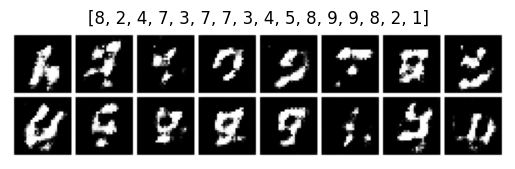

average prediction confidence over 1000 predictions: 0.38982152938842773
cumulative prediction counts: [46, 51, 135, 128, 72, 70, 22, 154, 286, 36]
epoch time: 17.420860290527344, total time: 17.420860290527344
Epoch [2/100] Batch [1/469] Discriminator Loss: 1.0739 Generator Loss: 0.8071
Epoch [2/100] Batch [101/469] Discriminator Loss: 1.1214 Generator Loss: 0.9845
Epoch [2/100] Batch [201/469] Discriminator Loss: 1.1047 Generator Loss: 1.0969
Epoch [2/100] Batch [301/469] Discriminator Loss: 1.0912 Generator Loss: 1.0491
Epoch [2/100] Batch [401/469] Discriminator Loss: 1.0873 Generator Loss: 1.2749


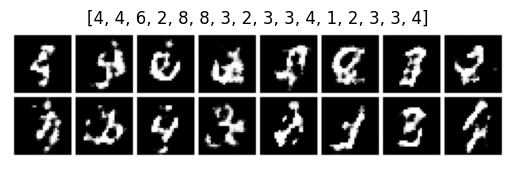

average prediction confidence over 1000 predictions: 0.4028255343437195
cumulative prediction counts: [117, 80, 214, 327, 123, 177, 55, 273, 461, 173]
epoch time: 16.826102256774902, total time: 34.246962547302246
Epoch [3/100] Batch [1/469] Discriminator Loss: 1.0307 Generator Loss: 1.1976
Epoch [3/100] Batch [101/469] Discriminator Loss: 1.0586 Generator Loss: 0.6949
Epoch [3/100] Batch [201/469] Discriminator Loss: 1.0238 Generator Loss: 0.7013
Epoch [3/100] Batch [301/469] Discriminator Loss: 0.9332 Generator Loss: 1.0795
Epoch [3/100] Batch [401/469] Discriminator Loss: 0.9546 Generator Loss: 0.8658


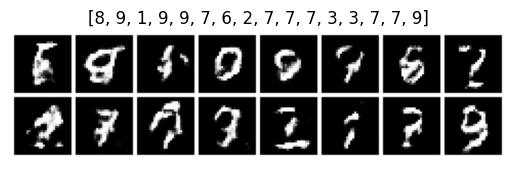

average prediction confidence over 1000 predictions: 0.4455347955226898
cumulative prediction counts: [223, 120, 278, 469, 182, 231, 113, 378, 666, 340]
epoch time: 16.685579776763916, total time: 50.93254232406616
Epoch [4/100] Batch [1/469] Discriminator Loss: 0.9429 Generator Loss: 1.5116
Epoch [4/100] Batch [101/469] Discriminator Loss: 0.9845 Generator Loss: 0.8578
Epoch [4/100] Batch [201/469] Discriminator Loss: 0.9448 Generator Loss: 0.9315
Epoch [4/100] Batch [301/469] Discriminator Loss: 1.0273 Generator Loss: 0.8554
Epoch [4/100] Batch [401/469] Discriminator Loss: 1.0890 Generator Loss: 1.3476


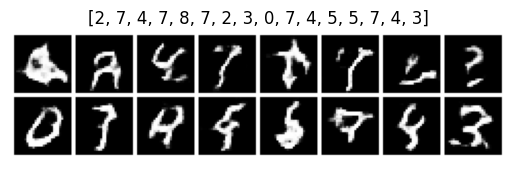

average prediction confidence over 1000 predictions: 0.4990849792957306
cumulative prediction counts: [303, 196, 342, 582, 298, 283, 174, 522, 818, 482]
epoch time: 17.43493390083313, total time: 68.36747622489929
Epoch [5/100] Batch [1/469] Discriminator Loss: 1.2252 Generator Loss: 0.5423
Epoch [5/100] Batch [101/469] Discriminator Loss: 1.0672 Generator Loss: 1.4129
Epoch [5/100] Batch [201/469] Discriminator Loss: 1.0585 Generator Loss: 1.0196
Epoch [5/100] Batch [301/469] Discriminator Loss: 1.1719 Generator Loss: 0.6952
Epoch [5/100] Batch [401/469] Discriminator Loss: 1.0509 Generator Loss: 1.1053


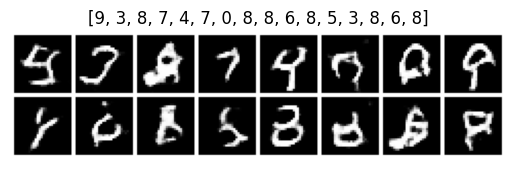

average prediction confidence over 1000 predictions: 0.5126379728317261
cumulative prediction counts: [392, 279, 424, 694, 411, 337, 240, 663, 961, 599]
epoch time: 16.801878690719604, total time: 85.1693549156189
Epoch [6/100] Batch [1/469] Discriminator Loss: 1.0273 Generator Loss: 1.1373
Epoch [6/100] Batch [101/469] Discriminator Loss: 1.1150 Generator Loss: 0.8978
Epoch [6/100] Batch [201/469] Discriminator Loss: 1.0781 Generator Loss: 0.9525
Epoch [6/100] Batch [301/469] Discriminator Loss: 1.0515 Generator Loss: 0.8163
Epoch [6/100] Batch [401/469] Discriminator Loss: 1.2322 Generator Loss: 1.4150


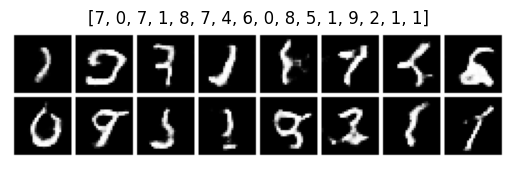

average prediction confidence over 1000 predictions: 0.5209681987762451
cumulative prediction counts: [509, 370, 497, 802, 477, 397, 285, 800, 1098, 765]
epoch time: 17.10333490371704, total time: 102.27268981933594
Epoch [7/100] Batch [1/469] Discriminator Loss: 1.0608 Generator Loss: 0.8559
Epoch [7/100] Batch [101/469] Discriminator Loss: 1.0039 Generator Loss: 0.9061
Epoch [7/100] Batch [201/469] Discriminator Loss: 1.0895 Generator Loss: 0.7643
Epoch [7/100] Batch [301/469] Discriminator Loss: 1.0403 Generator Loss: 1.1483
Epoch [7/100] Batch [401/469] Discriminator Loss: 1.0903 Generator Loss: 1.1676


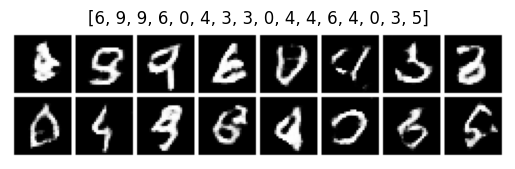

average prediction confidence over 1000 predictions: 0.5180160403251648
cumulative prediction counts: [606, 469, 563, 888, 573, 485, 330, 922, 1242, 922]
epoch time: 17.135268926620483, total time: 119.40795874595642
Epoch [8/100] Batch [1/469] Discriminator Loss: 1.2260 Generator Loss: 1.5427
Epoch [8/100] Batch [101/469] Discriminator Loss: 1.0919 Generator Loss: 1.3960
Epoch [8/100] Batch [201/469] Discriminator Loss: 1.0592 Generator Loss: 0.9854
Epoch [8/100] Batch [301/469] Discriminator Loss: 1.0709 Generator Loss: 0.7852
Epoch [8/100] Batch [401/469] Discriminator Loss: 1.0121 Generator Loss: 1.0585


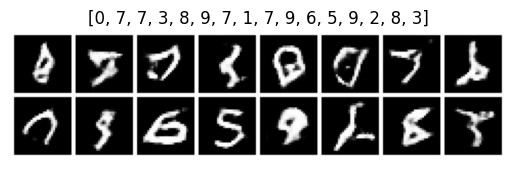

average prediction confidence over 1000 predictions: 0.5209360718727112
cumulative prediction counts: [703, 555, 646, 1012, 658, 561, 377, 1034, 1354, 1100]
epoch time: 16.683717727661133, total time: 136.09167647361755
Epoch [9/100] Batch [1/469] Discriminator Loss: 1.0340 Generator Loss: 1.2644
Epoch [9/100] Batch [101/469] Discriminator Loss: 1.1072 Generator Loss: 1.3472
Epoch [9/100] Batch [201/469] Discriminator Loss: 1.1158 Generator Loss: 1.4446
Epoch [9/100] Batch [301/469] Discriminator Loss: 1.0999 Generator Loss: 1.5355
Epoch [9/100] Batch [401/469] Discriminator Loss: 1.0050 Generator Loss: 1.1904


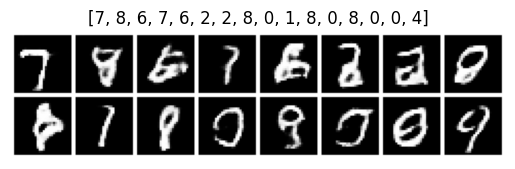

average prediction confidence over 1000 predictions: 0.5261496901512146
cumulative prediction counts: [802, 661, 720, 1116, 745, 648, 432, 1132, 1494, 1250]
epoch time: 17.661102056503296, total time: 153.75277853012085
Epoch [10/100] Batch [1/469] Discriminator Loss: 1.0110 Generator Loss: 1.0897
Epoch [10/100] Batch [101/469] Discriminator Loss: 1.0397 Generator Loss: 0.7681
Epoch [10/100] Batch [201/469] Discriminator Loss: 1.0024 Generator Loss: 1.4292
Epoch [10/100] Batch [301/469] Discriminator Loss: 1.1002 Generator Loss: 0.6248
Epoch [10/100] Batch [401/469] Discriminator Loss: 1.0072 Generator Loss: 1.1673


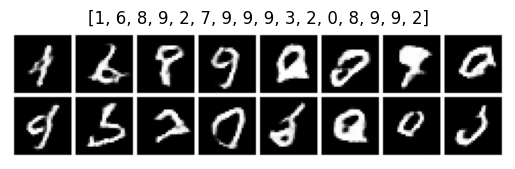

average prediction confidence over 1000 predictions: 0.5282904505729675
cumulative prediction counts: [910, 739, 800, 1217, 818, 719, 493, 1260, 1622, 1422]
epoch time: 16.745802402496338, total time: 170.4985809326172
Epoch [11/100] Batch [1/469] Discriminator Loss: 1.0766 Generator Loss: 1.4219
Epoch [11/100] Batch [101/469] Discriminator Loss: 0.9862 Generator Loss: 0.9540
Epoch [11/100] Batch [201/469] Discriminator Loss: 0.9453 Generator Loss: 1.1754
Epoch [11/100] Batch [301/469] Discriminator Loss: 1.0108 Generator Loss: 1.2323
Epoch [11/100] Batch [401/469] Discriminator Loss: 1.0469 Generator Loss: 1.2862


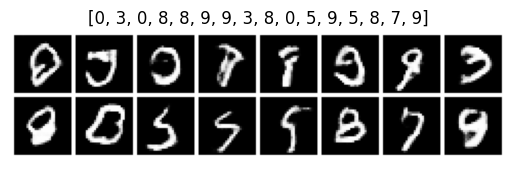

average prediction confidence over 1000 predictions: 0.530170202255249
cumulative prediction counts: [1010, 823, 881, 1319, 905, 802, 538, 1385, 1756, 1581]
epoch time: 17.01629066467285, total time: 187.51487159729004
Epoch [12/100] Batch [1/469] Discriminator Loss: 0.9932 Generator Loss: 0.8866
Epoch [12/100] Batch [101/469] Discriminator Loss: 1.0091 Generator Loss: 1.1500
Epoch [12/100] Batch [201/469] Discriminator Loss: 1.0505 Generator Loss: 0.6610
Epoch [12/100] Batch [301/469] Discriminator Loss: 1.0180 Generator Loss: 1.4933
Epoch [12/100] Batch [401/469] Discriminator Loss: 1.1027 Generator Loss: 1.4795


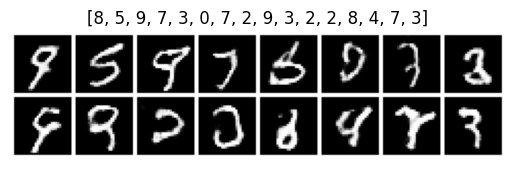

average prediction confidence over 1000 predictions: 0.5330147743225098
cumulative prediction counts: [1115, 902, 978, 1410, 994, 883, 588, 1521, 1892, 1717]
epoch time: 16.880606174468994, total time: 204.39547777175903
Epoch [13/100] Batch [1/469] Discriminator Loss: 0.8893 Generator Loss: 1.2294
Epoch [13/100] Batch [101/469] Discriminator Loss: 0.9186 Generator Loss: 1.1728
Epoch [13/100] Batch [201/469] Discriminator Loss: 0.9619 Generator Loss: 1.2585
Epoch [13/100] Batch [301/469] Discriminator Loss: 0.9793 Generator Loss: 1.0838
Epoch [13/100] Batch [401/469] Discriminator Loss: 0.9868 Generator Loss: 1.7035


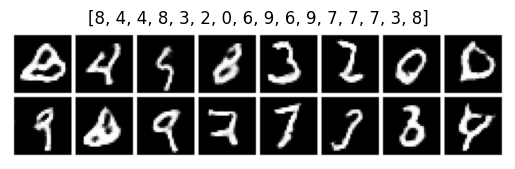

average prediction confidence over 1000 predictions: 0.5230450630187988
cumulative prediction counts: [1214, 972, 1045, 1543, 1067, 956, 644, 1672, 2020, 1867]
epoch time: 16.659642457962036, total time: 221.05512022972107
Epoch [14/100] Batch [1/469] Discriminator Loss: 0.8793 Generator Loss: 1.4506
Epoch [14/100] Batch [101/469] Discriminator Loss: 0.9381 Generator Loss: 1.3180
Epoch [14/100] Batch [201/469] Discriminator Loss: 0.8756 Generator Loss: 1.4272
Epoch [14/100] Batch [301/469] Discriminator Loss: 0.8500 Generator Loss: 1.2215
Epoch [14/100] Batch [401/469] Discriminator Loss: 1.1043 Generator Loss: 0.7052


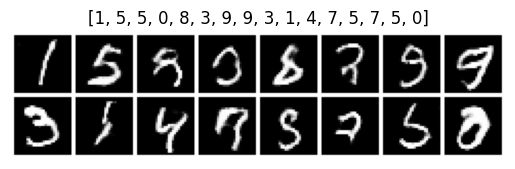

average prediction confidence over 1000 predictions: 0.5202606916427612
cumulative prediction counts: [1318, 1058, 1124, 1638, 1150, 1031, 692, 1802, 2155, 2032]
epoch time: 17.335134744644165, total time: 238.39025497436523
Epoch [15/100] Batch [1/469] Discriminator Loss: 0.8941 Generator Loss: 1.0963
Epoch [15/100] Batch [101/469] Discriminator Loss: 0.9078 Generator Loss: 1.5947
Epoch [15/100] Batch [201/469] Discriminator Loss: 0.8728 Generator Loss: 1.2064
Epoch [15/100] Batch [301/469] Discriminator Loss: 0.9712 Generator Loss: 1.7497
Epoch [15/100] Batch [401/469] Discriminator Loss: 0.8832 Generator Loss: 1.3879


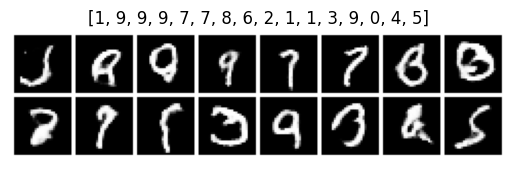

average prediction confidence over 1000 predictions: 0.5331165194511414
cumulative prediction counts: [1419, 1151, 1199, 1723, 1231, 1107, 737, 1933, 2309, 2191]
epoch time: 16.658453226089478, total time: 255.0487082004547
Epoch [16/100] Batch [1/469] Discriminator Loss: 0.8810 Generator Loss: 1.3878
Epoch [16/100] Batch [101/469] Discriminator Loss: 0.9152 Generator Loss: 0.9199
Epoch [16/100] Batch [201/469] Discriminator Loss: 0.9445 Generator Loss: 0.9564
Epoch [16/100] Batch [301/469] Discriminator Loss: 0.8503 Generator Loss: 1.1601
Epoch [16/100] Batch [401/469] Discriminator Loss: 0.9113 Generator Loss: 1.2023


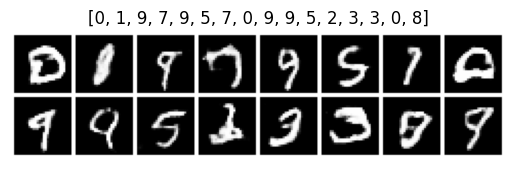

average prediction confidence over 1000 predictions: 0.5449427962303162
cumulative prediction counts: [1538, 1229, 1270, 1827, 1314, 1160, 779, 2073, 2458, 2352]
epoch time: 16.83739447593689, total time: 271.8861026763916
Epoch [17/100] Batch [1/469] Discriminator Loss: 0.9447 Generator Loss: 1.4792
Epoch [17/100] Batch [101/469] Discriminator Loss: 0.8750 Generator Loss: 1.3670
Epoch [17/100] Batch [201/469] Discriminator Loss: 0.8840 Generator Loss: 1.1012
Epoch [17/100] Batch [301/469] Discriminator Loss: 0.9056 Generator Loss: 1.4262
Epoch [17/100] Batch [401/469] Discriminator Loss: 0.8901 Generator Loss: 1.3302


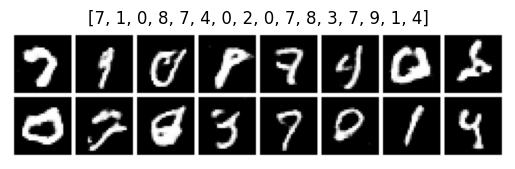

average prediction confidence over 1000 predictions: 0.5406702160835266
cumulative prediction counts: [1663, 1315, 1329, 1925, 1390, 1234, 834, 2186, 2605, 2519]
epoch time: 17.201162338256836, total time: 289.08726501464844
Epoch [18/100] Batch [1/469] Discriminator Loss: 0.9663 Generator Loss: 0.9537
Epoch [18/100] Batch [101/469] Discriminator Loss: 1.0460 Generator Loss: 0.8846
Epoch [18/100] Batch [201/469] Discriminator Loss: 0.8774 Generator Loss: 1.1595
Epoch [18/100] Batch [301/469] Discriminator Loss: 0.7615 Generator Loss: 1.3167
Epoch [18/100] Batch [401/469] Discriminator Loss: 0.8613 Generator Loss: 1.1991


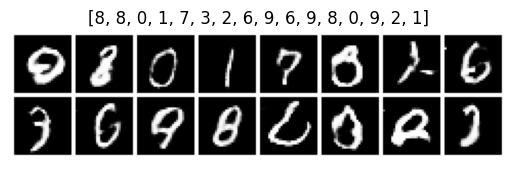

average prediction confidence over 1000 predictions: 0.5456212162971497
cumulative prediction counts: [1761, 1384, 1418, 2021, 1473, 1307, 867, 2317, 2747, 2705]
epoch time: 16.49272346496582, total time: 305.57998847961426
Epoch [19/100] Batch [1/469] Discriminator Loss: 0.9032 Generator Loss: 1.1603
Epoch [19/100] Batch [101/469] Discriminator Loss: 0.9864 Generator Loss: 1.3662
Epoch [19/100] Batch [201/469] Discriminator Loss: 0.8802 Generator Loss: 1.6199
Epoch [19/100] Batch [301/469] Discriminator Loss: 0.8858 Generator Loss: 1.0810
Epoch [19/100] Batch [401/469] Discriminator Loss: 1.0324 Generator Loss: 0.7144


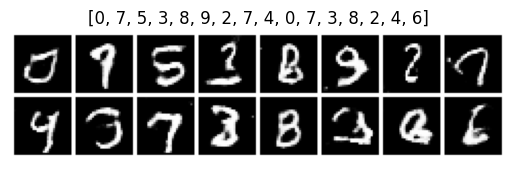

average prediction confidence over 1000 predictions: 0.5481407046318054
cumulative prediction counts: [1860, 1451, 1491, 2118, 1549, 1378, 906, 2461, 2899, 2887]
epoch time: 16.64961051940918, total time: 322.22959899902344
Epoch [20/100] Batch [1/469] Discriminator Loss: 0.8432 Generator Loss: 1.2999
Epoch [20/100] Batch [101/469] Discriminator Loss: 0.9926 Generator Loss: 1.8323
Epoch [20/100] Batch [201/469] Discriminator Loss: 0.8957 Generator Loss: 1.2305
Epoch [20/100] Batch [301/469] Discriminator Loss: 0.8049 Generator Loss: 1.3001
Epoch [20/100] Batch [401/469] Discriminator Loss: 0.8608 Generator Loss: 2.0044


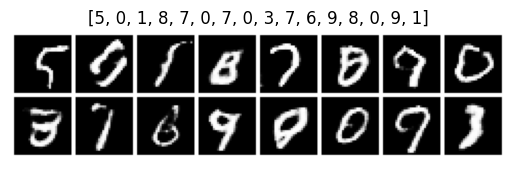

average prediction confidence over 1000 predictions: 0.5608010292053223
cumulative prediction counts: [1973, 1528, 1571, 2213, 1623, 1442, 945, 2594, 3036, 3075]
epoch time: 17.305487155914307, total time: 339.53508615493774
Epoch [21/100] Batch [1/469] Discriminator Loss: 0.8824 Generator Loss: 1.6530
Epoch [21/100] Batch [101/469] Discriminator Loss: 0.8480 Generator Loss: 1.3203
Epoch [21/100] Batch [201/469] Discriminator Loss: 0.8487 Generator Loss: 1.0763
Epoch [21/100] Batch [301/469] Discriminator Loss: 0.8790 Generator Loss: 1.5771
Epoch [21/100] Batch [401/469] Discriminator Loss: 0.8723 Generator Loss: 0.7845


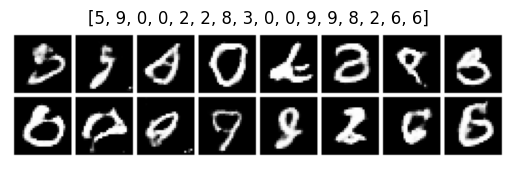

average prediction confidence over 1000 predictions: 0.548271119594574
cumulative prediction counts: [2110, 1605, 1633, 2306, 1690, 1508, 970, 2735, 3182, 3261]
epoch time: 16.64779806137085, total time: 356.1828842163086
Epoch [22/100] Batch [1/469] Discriminator Loss: 0.8975 Generator Loss: 0.9110
Epoch [22/100] Batch [101/469] Discriminator Loss: 0.8788 Generator Loss: 1.3987
Epoch [22/100] Batch [201/469] Discriminator Loss: 0.9185 Generator Loss: 2.0031
Epoch [22/100] Batch [301/469] Discriminator Loss: 0.9795 Generator Loss: 1.0253
Epoch [22/100] Batch [401/469] Discriminator Loss: 0.8359 Generator Loss: 1.0470


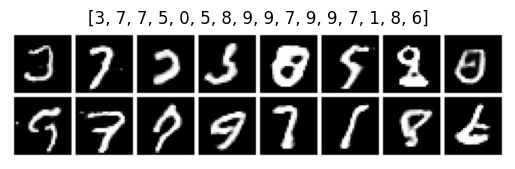

average prediction confidence over 1000 predictions: 0.5530254244804382
cumulative prediction counts: [2221, 1692, 1713, 2409, 1751, 1571, 1006, 2870, 3330, 3437]
epoch time: 17.789275884628296, total time: 373.9721601009369
Epoch [23/100] Batch [1/469] Discriminator Loss: 0.8990 Generator Loss: 1.6738
Epoch [23/100] Batch [101/469] Discriminator Loss: 0.8331 Generator Loss: 1.8101
Epoch [23/100] Batch [201/469] Discriminator Loss: 0.7238 Generator Loss: 1.3391
Epoch [23/100] Batch [301/469] Discriminator Loss: 0.8480 Generator Loss: 1.1630
Epoch [23/100] Batch [401/469] Discriminator Loss: 1.0030 Generator Loss: 2.1952


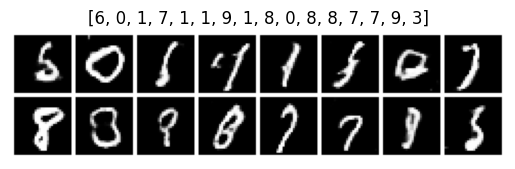

average prediction confidence over 1000 predictions: 0.5565723180770874
cumulative prediction counts: [2329, 1772, 1794, 2503, 1813, 1650, 1039, 3011, 3469, 3620]
epoch time: 17.354528665542603, total time: 391.3266887664795
Epoch [24/100] Batch [1/469] Discriminator Loss: 0.8274 Generator Loss: 0.9033
Epoch [24/100] Batch [101/469] Discriminator Loss: 0.8921 Generator Loss: 1.7734
Epoch [24/100] Batch [201/469] Discriminator Loss: 0.8090 Generator Loss: 1.4198
Epoch [24/100] Batch [301/469] Discriminator Loss: 0.8800 Generator Loss: 1.7924
Epoch [24/100] Batch [401/469] Discriminator Loss: 0.9055 Generator Loss: 1.1267


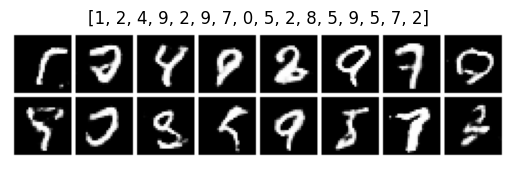

average prediction confidence over 1000 predictions: 0.551042377948761
cumulative prediction counts: [2465, 1851, 1866, 2592, 1876, 1721, 1057, 3153, 3624, 3795]
epoch time: 17.59658718109131, total time: 408.9232759475708
Epoch [25/100] Batch [1/469] Discriminator Loss: 0.8303 Generator Loss: 1.3663
Epoch [25/100] Batch [101/469] Discriminator Loss: 0.9420 Generator Loss: 0.8335
Epoch [25/100] Batch [201/469] Discriminator Loss: 0.8852 Generator Loss: 0.9678
Epoch [25/100] Batch [301/469] Discriminator Loss: 0.9650 Generator Loss: 0.9676
Epoch [25/100] Batch [401/469] Discriminator Loss: 0.8646 Generator Loss: 1.3643


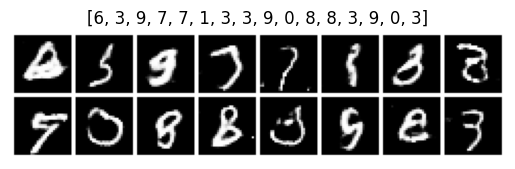

average prediction confidence over 1000 predictions: 0.5527142882347107
cumulative prediction counts: [2592, 1926, 1939, 2699, 1937, 1778, 1087, 3284, 3760, 3998]
epoch time: 17.608209371566772, total time: 426.5314853191376
Epoch [26/100] Batch [1/469] Discriminator Loss: 0.8720 Generator Loss: 1.7306
Epoch [26/100] Batch [101/469] Discriminator Loss: 0.9203 Generator Loss: 1.2167
Epoch [26/100] Batch [201/469] Discriminator Loss: 0.8632 Generator Loss: 1.4840
Epoch [26/100] Batch [301/469] Discriminator Loss: 0.8211 Generator Loss: 1.6337
Epoch [26/100] Batch [401/469] Discriminator Loss: 0.8449 Generator Loss: 1.6557


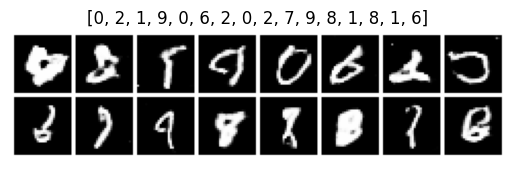

average prediction confidence over 1000 predictions: 0.5573343634605408
cumulative prediction counts: [2717, 2010, 2006, 2794, 2005, 1843, 1115, 3417, 3910, 4183]
epoch time: 16.802610397338867, total time: 443.33409571647644
Epoch [27/100] Batch [1/469] Discriminator Loss: 0.7898 Generator Loss: 1.2861
Epoch [27/100] Batch [101/469] Discriminator Loss: 0.7437 Generator Loss: 1.5900
Epoch [27/100] Batch [201/469] Discriminator Loss: 0.8224 Generator Loss: 1.5302
Epoch [27/100] Batch [301/469] Discriminator Loss: 0.8218 Generator Loss: 1.2141
Epoch [27/100] Batch [401/469] Discriminator Loss: 0.8358 Generator Loss: 1.1100


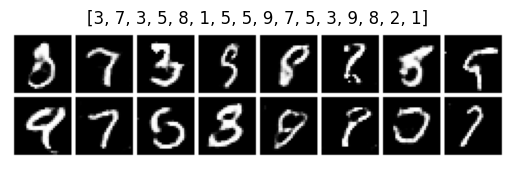

average prediction confidence over 1000 predictions: 0.5552560091018677
cumulative prediction counts: [2845, 2080, 2086, 2893, 2077, 1903, 1144, 3564, 4030, 4378]
epoch time: 17.75916361808777, total time: 461.0932593345642
Epoch [28/100] Batch [1/469] Discriminator Loss: 0.8745 Generator Loss: 1.6982
Epoch [28/100] Batch [101/469] Discriminator Loss: 0.7973 Generator Loss: 1.6102
Epoch [28/100] Batch [201/469] Discriminator Loss: 0.7374 Generator Loss: 1.9415
Epoch [28/100] Batch [301/469] Discriminator Loss: 0.8106 Generator Loss: 1.8140
Epoch [28/100] Batch [401/469] Discriminator Loss: 0.7948 Generator Loss: 1.7456


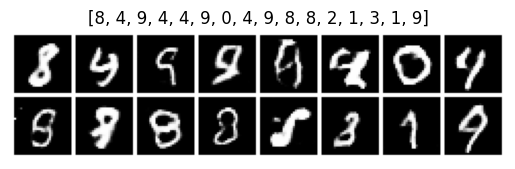

average prediction confidence over 1000 predictions: 0.5526132583618164
cumulative prediction counts: [2973, 2156, 2147, 2994, 2134, 1956, 1178, 3716, 4191, 4555]
epoch time: 16.991939783096313, total time: 478.0851991176605
Epoch [29/100] Batch [1/469] Discriminator Loss: 0.8587 Generator Loss: 1.6533
Epoch [29/100] Batch [101/469] Discriminator Loss: 0.9411 Generator Loss: 1.8821
Epoch [29/100] Batch [201/469] Discriminator Loss: 1.0719 Generator Loss: 0.5372
Epoch [29/100] Batch [301/469] Discriminator Loss: 0.8965 Generator Loss: 1.9561
Epoch [29/100] Batch [401/469] Discriminator Loss: 0.7778 Generator Loss: 1.3430


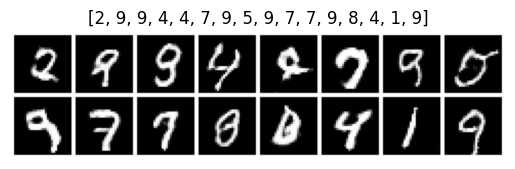

average prediction confidence over 1000 predictions: 0.5655720233917236
cumulative prediction counts: [3096, 2223, 2207, 3094, 2187, 2011, 1218, 3857, 4332, 4775]
epoch time: 17.196293115615845, total time: 495.28149223327637
Epoch [30/100] Batch [1/469] Discriminator Loss: 0.8127 Generator Loss: 1.4252
Epoch [30/100] Batch [101/469] Discriminator Loss: 0.8320 Generator Loss: 1.3606
Epoch [30/100] Batch [201/469] Discriminator Loss: 0.8687 Generator Loss: 1.1568
Epoch [30/100] Batch [301/469] Discriminator Loss: 0.8127 Generator Loss: 1.3976
Epoch [30/100] Batch [401/469] Discriminator Loss: 0.7838 Generator Loss: 1.2601


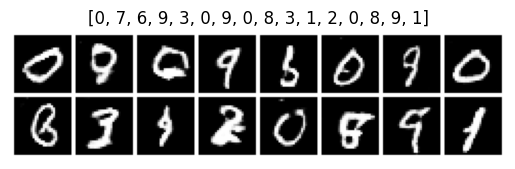

average prediction confidence over 1000 predictions: 0.5713943243026733
cumulative prediction counts: [3243, 2296, 2272, 3184, 2246, 2059, 1259, 3998, 4479, 4964]
epoch time: 17.30984902381897, total time: 512.5913412570953
Epoch [31/100] Batch [1/469] Discriminator Loss: 0.8162 Generator Loss: 1.6496
Epoch [31/100] Batch [101/469] Discriminator Loss: 0.8104 Generator Loss: 1.3576
Epoch [31/100] Batch [201/469] Discriminator Loss: 0.8874 Generator Loss: 1.1335
Epoch [31/100] Batch [301/469] Discriminator Loss: 1.1146 Generator Loss: 0.9921
Epoch [31/100] Batch [401/469] Discriminator Loss: 0.8895 Generator Loss: 1.1618


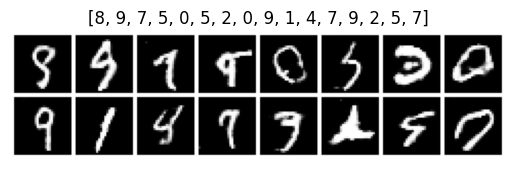

average prediction confidence over 1000 predictions: 0.5624901652336121
cumulative prediction counts: [3357, 2373, 2353, 3281, 2305, 2116, 1305, 4164, 4615, 5131]
epoch time: 16.73500108718872, total time: 529.3263423442841
Epoch [32/100] Batch [1/469] Discriminator Loss: 0.7504 Generator Loss: 1.5674
Epoch [32/100] Batch [101/469] Discriminator Loss: 0.8977 Generator Loss: 1.0283
Epoch [32/100] Batch [201/469] Discriminator Loss: 1.3634 Generator Loss: 2.7848
Epoch [32/100] Batch [301/469] Discriminator Loss: 0.8977 Generator Loss: 2.0374
Epoch [32/100] Batch [401/469] Discriminator Loss: 0.9387 Generator Loss: 2.0011


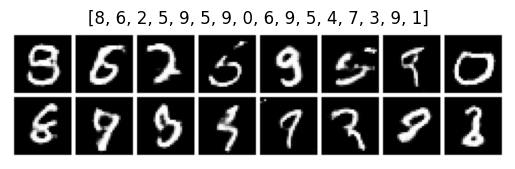

average prediction confidence over 1000 predictions: 0.568142294883728
cumulative prediction counts: [3483, 2430, 2414, 3389, 2381, 2165, 1348, 4319, 4755, 5316]
epoch time: 17.441516160964966, total time: 546.767858505249
Epoch [33/100] Batch [1/469] Discriminator Loss: 0.8581 Generator Loss: 1.4024
Epoch [33/100] Batch [101/469] Discriminator Loss: 0.8849 Generator Loss: 2.1090
Epoch [33/100] Batch [201/469] Discriminator Loss: 0.8382 Generator Loss: 1.4217
Epoch [33/100] Batch [301/469] Discriminator Loss: 0.7836 Generator Loss: 1.3519
Epoch [33/100] Batch [401/469] Discriminator Loss: 0.8297 Generator Loss: 1.7305


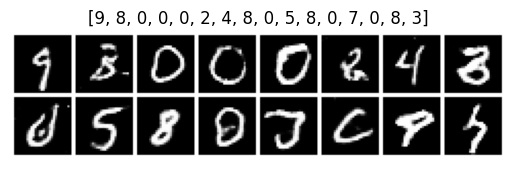

average prediction confidence over 1000 predictions: 0.5762722492218018
cumulative prediction counts: [3618, 2498, 2496, 3487, 2447, 2203, 1377, 4459, 4905, 5510]
epoch time: 16.65601658821106, total time: 563.4238750934601
Epoch [34/100] Batch [1/469] Discriminator Loss: 0.8591 Generator Loss: 1.5729
Epoch [34/100] Batch [101/469] Discriminator Loss: 0.8375 Generator Loss: 2.0789
Epoch [34/100] Batch [201/469] Discriminator Loss: 0.8272 Generator Loss: 1.3801
Epoch [34/100] Batch [301/469] Discriminator Loss: 1.0406 Generator Loss: 2.5697
Epoch [34/100] Batch [401/469] Discriminator Loss: 0.8238 Generator Loss: 1.9532


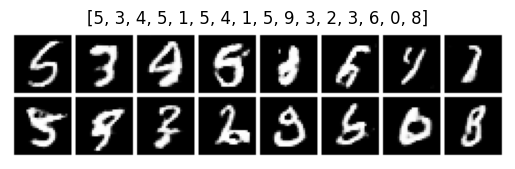

average prediction confidence over 1000 predictions: 0.5702995657920837
cumulative prediction counts: [3751, 2565, 2569, 3591, 2511, 2267, 1410, 4612, 5027, 5697]
epoch time: 16.90684700012207, total time: 580.3307220935822
Epoch [35/100] Batch [1/469] Discriminator Loss: 0.7983 Generator Loss: 1.4829
Epoch [35/100] Batch [101/469] Discriminator Loss: 0.7655 Generator Loss: 1.6196
Epoch [35/100] Batch [201/469] Discriminator Loss: 0.7599 Generator Loss: 1.4415
Epoch [35/100] Batch [301/469] Discriminator Loss: 0.7633 Generator Loss: 1.5544
Epoch [35/100] Batch [401/469] Discriminator Loss: 0.7791 Generator Loss: 1.4970


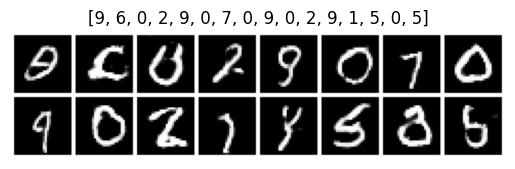

average prediction confidence over 1000 predictions: 0.5788359045982361
cumulative prediction counts: [3896, 2614, 2637, 3682, 2573, 2335, 1435, 4775, 5168, 5885]
epoch time: 17.527829885482788, total time: 597.8585519790649
Epoch [36/100] Batch [1/469] Discriminator Loss: 0.7834 Generator Loss: 1.5213
Epoch [36/100] Batch [101/469] Discriminator Loss: 0.8658 Generator Loss: 1.8783
Epoch [36/100] Batch [201/469] Discriminator Loss: 0.8559 Generator Loss: 1.2003
Epoch [36/100] Batch [301/469] Discriminator Loss: 0.8206 Generator Loss: 1.6139
Epoch [36/100] Batch [401/469] Discriminator Loss: 0.7462 Generator Loss: 1.6972


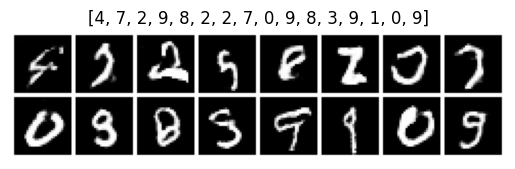

average prediction confidence over 1000 predictions: 0.5718768835067749
cumulative prediction counts: [4024, 2680, 2710, 3773, 2637, 2387, 1469, 4930, 5316, 6074]
epoch time: 16.73749351501465, total time: 614.5960454940796
Epoch [37/100] Batch [1/469] Discriminator Loss: 0.9655 Generator Loss: 2.3264
Epoch [37/100] Batch [101/469] Discriminator Loss: 0.9534 Generator Loss: 0.9479
Epoch [37/100] Batch [201/469] Discriminator Loss: 0.8991 Generator Loss: 1.1696
Epoch [37/100] Batch [301/469] Discriminator Loss: 0.7416 Generator Loss: 1.5615
Epoch [37/100] Batch [401/469] Discriminator Loss: 0.8401 Generator Loss: 1.6726


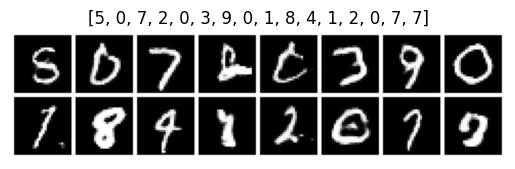

average prediction confidence over 1000 predictions: 0.5756416916847229
cumulative prediction counts: [4168, 2749, 2786, 3856, 2709, 2442, 1502, 5085, 5454, 6249]
epoch time: 17.290613412857056, total time: 631.8866589069366
Epoch [38/100] Batch [1/469] Discriminator Loss: 0.9615 Generator Loss: 0.9692
Epoch [38/100] Batch [101/469] Discriminator Loss: 0.9759 Generator Loss: 1.9707
Epoch [38/100] Batch [201/469] Discriminator Loss: 0.8622 Generator Loss: 1.5238
Epoch [38/100] Batch [301/469] Discriminator Loss: 0.7675 Generator Loss: 1.6038
Epoch [38/100] Batch [401/469] Discriminator Loss: 0.7797 Generator Loss: 1.6740


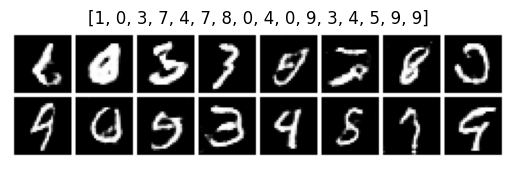

average prediction confidence over 1000 predictions: 0.5697967410087585
cumulative prediction counts: [4303, 2814, 2847, 3947, 2767, 2504, 1531, 5272, 5585, 6430]
epoch time: 17.092875719070435, total time: 648.9795346260071
Epoch [39/100] Batch [1/469] Discriminator Loss: 0.7968 Generator Loss: 1.9810
Epoch [39/100] Batch [101/469] Discriminator Loss: 0.8503 Generator Loss: 1.7065
Epoch [39/100] Batch [201/469] Discriminator Loss: 0.9856 Generator Loss: 2.2480
Epoch [39/100] Batch [301/469] Discriminator Loss: 0.7693 Generator Loss: 1.6651
Epoch [39/100] Batch [401/469] Discriminator Loss: 0.6975 Generator Loss: 1.4027


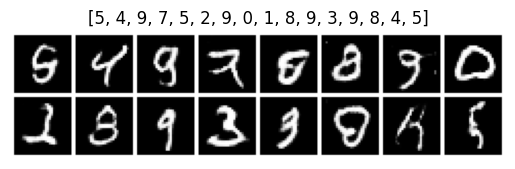

average prediction confidence over 1000 predictions: 0.5878131985664368
cumulative prediction counts: [4440, 2875, 2916, 4034, 2841, 2548, 1547, 5446, 5722, 6631]
epoch time: 16.936063766479492, total time: 665.9155983924866
Epoch [40/100] Batch [1/469] Discriminator Loss: 0.6613 Generator Loss: 1.4377
Epoch [40/100] Batch [101/469] Discriminator Loss: 0.8396 Generator Loss: 1.2399
Epoch [40/100] Batch [201/469] Discriminator Loss: 0.8164 Generator Loss: 1.4600
Epoch [40/100] Batch [301/469] Discriminator Loss: 0.8785 Generator Loss: 1.6576
Epoch [40/100] Batch [401/469] Discriminator Loss: 0.8111 Generator Loss: 1.8907


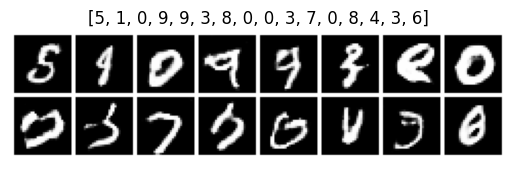

average prediction confidence over 1000 predictions: 0.5803152322769165
cumulative prediction counts: [4589, 2935, 2998, 4131, 2909, 2597, 1575, 5611, 5865, 6790]
epoch time: 17.733952045440674, total time: 683.6495504379272
Epoch [41/100] Batch [1/469] Discriminator Loss: 0.8031 Generator Loss: 1.3601
Epoch [41/100] Batch [101/469] Discriminator Loss: 0.8632 Generator Loss: 1.2970
Epoch [41/100] Batch [201/469] Discriminator Loss: 0.7594 Generator Loss: 1.9893
Epoch [41/100] Batch [301/469] Discriminator Loss: 0.7617 Generator Loss: 1.8351
Epoch [41/100] Batch [401/469] Discriminator Loss: 0.8865 Generator Loss: 1.9432


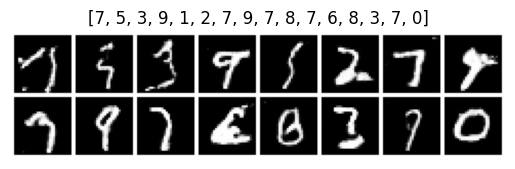

average prediction confidence over 1000 predictions: 0.5796190500259399
cumulative prediction counts: [4694, 3008, 3065, 4239, 2975, 2648, 1601, 5783, 6010, 6977]
epoch time: 17.015941381454468, total time: 700.6654918193817
Epoch [42/100] Batch [1/469] Discriminator Loss: 0.7877 Generator Loss: 1.7684
Epoch [42/100] Batch [101/469] Discriminator Loss: 0.7965 Generator Loss: 1.7639
Epoch [42/100] Batch [201/469] Discriminator Loss: 0.8821 Generator Loss: 1.4109
Epoch [42/100] Batch [301/469] Discriminator Loss: 0.7567 Generator Loss: 1.1992
Epoch [42/100] Batch [401/469] Discriminator Loss: 0.8391 Generator Loss: 1.4789


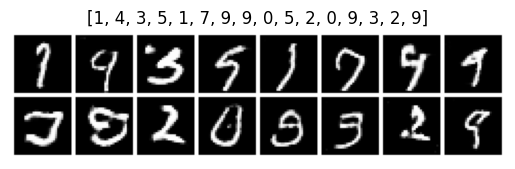

average prediction confidence over 1000 predictions: 0.5729417204856873
cumulative prediction counts: [4828, 3076, 3123, 4341, 3052, 2688, 1636, 5962, 6134, 7160]
epoch time: 17.6690673828125, total time: 718.3345592021942
Epoch [43/100] Batch [1/469] Discriminator Loss: 0.7600 Generator Loss: 1.1762
Epoch [43/100] Batch [101/469] Discriminator Loss: 0.8839 Generator Loss: 1.1749
Epoch [43/100] Batch [201/469] Discriminator Loss: 0.7340 Generator Loss: 1.6564
Epoch [43/100] Batch [301/469] Discriminator Loss: 0.8360 Generator Loss: 1.5429
Epoch [43/100] Batch [401/469] Discriminator Loss: 0.8217 Generator Loss: 1.3083


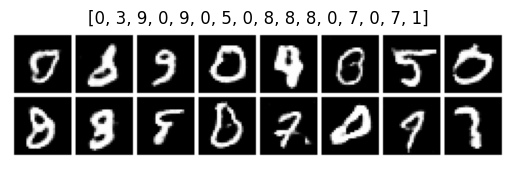

average prediction confidence over 1000 predictions: 0.5917917490005493
cumulative prediction counts: [4954, 3141, 3199, 4443, 3125, 2736, 1655, 6117, 6281, 7349]
epoch time: 17.306833505630493, total time: 735.6413927078247
Epoch [44/100] Batch [1/469] Discriminator Loss: 0.9296 Generator Loss: 1.2340
Epoch [44/100] Batch [101/469] Discriminator Loss: 0.8351 Generator Loss: 1.4376
Epoch [44/100] Batch [201/469] Discriminator Loss: 0.7045 Generator Loss: 1.7515
Epoch [44/100] Batch [301/469] Discriminator Loss: 0.7483 Generator Loss: 1.7468
Epoch [44/100] Batch [401/469] Discriminator Loss: 0.8034 Generator Loss: 1.7503


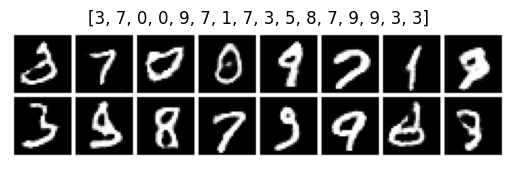

average prediction confidence over 1000 predictions: 0.5963277816772461
cumulative prediction counts: [5092, 3195, 3269, 4524, 3201, 2773, 1678, 6319, 6431, 7518]
epoch time: 16.879109382629395, total time: 752.5205020904541
Epoch [45/100] Batch [1/469] Discriminator Loss: 1.0049 Generator Loss: 1.0447
Epoch [45/100] Batch [101/469] Discriminator Loss: 0.8350 Generator Loss: 1.1324
Epoch [45/100] Batch [201/469] Discriminator Loss: 0.8893 Generator Loss: 1.2984
Epoch [45/100] Batch [301/469] Discriminator Loss: 0.8085 Generator Loss: 1.9729
Epoch [45/100] Batch [401/469] Discriminator Loss: 1.0315 Generator Loss: 1.3068


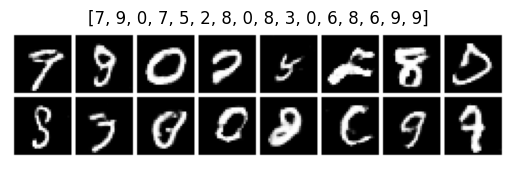

average prediction confidence over 1000 predictions: 0.5751886367797852
cumulative prediction counts: [5213, 3252, 3345, 4608, 3270, 2823, 1703, 6499, 6579, 7708]
epoch time: 17.715441942214966, total time: 770.2359440326691
Epoch [46/100] Batch [1/469] Discriminator Loss: 0.7770 Generator Loss: 1.7164
Epoch [46/100] Batch [101/469] Discriminator Loss: 0.8456 Generator Loss: 1.0693
Epoch [46/100] Batch [201/469] Discriminator Loss: 0.9146 Generator Loss: 0.9894
Epoch [46/100] Batch [301/469] Discriminator Loss: 0.8360 Generator Loss: 2.0236
Epoch [46/100] Batch [401/469] Discriminator Loss: 0.8643 Generator Loss: 1.5207


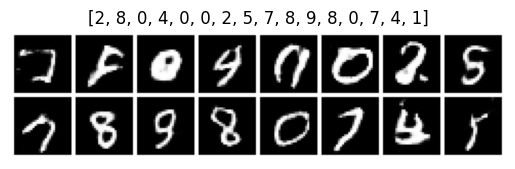

average prediction confidence over 1000 predictions: 0.598024845123291
cumulative prediction counts: [5354, 3309, 3410, 4701, 3336, 2874, 1728, 6652, 6726, 7910]
epoch time: 16.902331590652466, total time: 787.1382756233215
Epoch [47/100] Batch [1/469] Discriminator Loss: 0.7446 Generator Loss: 1.3528
Epoch [47/100] Batch [101/469] Discriminator Loss: 0.7556 Generator Loss: 1.9806
Epoch [47/100] Batch [201/469] Discriminator Loss: 0.8683 Generator Loss: 1.1672
Epoch [47/100] Batch [301/469] Discriminator Loss: 0.8132 Generator Loss: 1.3641
Epoch [47/100] Batch [401/469] Discriminator Loss: 0.8020 Generator Loss: 1.5969


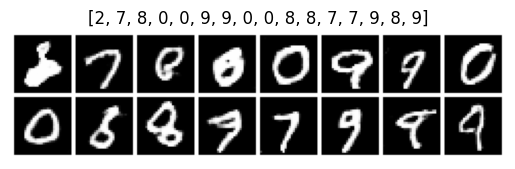

average prediction confidence over 1000 predictions: 0.5809081196784973
cumulative prediction counts: [5480, 3381, 3486, 4790, 3406, 2909, 1759, 6823, 6883, 8083]
epoch time: 17.550302743911743, total time: 804.6885783672333
Epoch [48/100] Batch [1/469] Discriminator Loss: 0.8133 Generator Loss: 1.9780
Epoch [48/100] Batch [101/469] Discriminator Loss: 0.8098 Generator Loss: 1.8104
Epoch [48/100] Batch [201/469] Discriminator Loss: 0.7156 Generator Loss: 1.3577
Epoch [48/100] Batch [301/469] Discriminator Loss: 0.9072 Generator Loss: 1.2601
Epoch [48/100] Batch [401/469] Discriminator Loss: 0.8945 Generator Loss: 0.9424


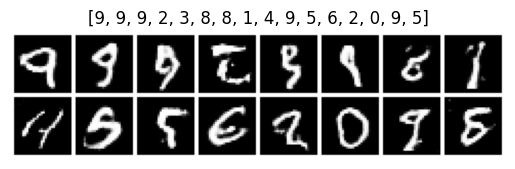

average prediction confidence over 1000 predictions: 0.5937384366989136
cumulative prediction counts: [5601, 3445, 3544, 4874, 3469, 2964, 1780, 6997, 7016, 8310]
epoch time: 17.486621618270874, total time: 822.1751999855042
Epoch [49/100] Batch [1/469] Discriminator Loss: 0.8853 Generator Loss: 1.1606
Epoch [49/100] Batch [101/469] Discriminator Loss: 0.8280 Generator Loss: 2.0770
Epoch [49/100] Batch [201/469] Discriminator Loss: 0.7295 Generator Loss: 1.6090
Epoch [49/100] Batch [301/469] Discriminator Loss: 0.7723 Generator Loss: 1.3444
Epoch [49/100] Batch [401/469] Discriminator Loss: 0.8375 Generator Loss: 1.8052


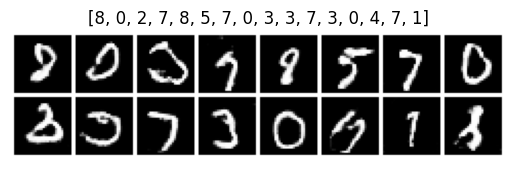

average prediction confidence over 1000 predictions: 0.584713876247406
cumulative prediction counts: [5717, 3510, 3609, 4956, 3552, 3004, 1809, 7171, 7168, 8504]
epoch time: 16.91511034965515, total time: 839.0903103351593
Epoch [50/100] Batch [1/469] Discriminator Loss: 0.9187 Generator Loss: 2.3468
Epoch [50/100] Batch [101/469] Discriminator Loss: 0.9508 Generator Loss: 2.5887
Epoch [50/100] Batch [201/469] Discriminator Loss: 0.7647 Generator Loss: 1.9751
Epoch [50/100] Batch [301/469] Discriminator Loss: 0.8011 Generator Loss: 2.1439
Epoch [50/100] Batch [401/469] Discriminator Loss: 0.7350 Generator Loss: 1.2672


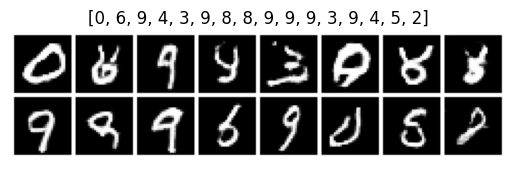

average prediction confidence over 1000 predictions: 0.5900318622589111
cumulative prediction counts: [5833, 3577, 3677, 5032, 3629, 3054, 1828, 7349, 7311, 8710]
epoch time: 20.982860565185547, total time: 860.0731709003448
Epoch [51/100] Batch [1/469] Discriminator Loss: 0.8385 Generator Loss: 2.4744
Epoch [51/100] Batch [101/469] Discriminator Loss: 0.9060 Generator Loss: 0.9572
Epoch [51/100] Batch [201/469] Discriminator Loss: 0.8783 Generator Loss: 1.1725
Epoch [51/100] Batch [301/469] Discriminator Loss: 0.9450 Generator Loss: 1.0332
Epoch [51/100] Batch [401/469] Discriminator Loss: 0.7860 Generator Loss: 1.3000


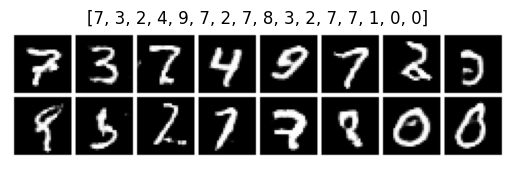

average prediction confidence over 1000 predictions: 0.5912429690361023
cumulative prediction counts: [5970, 3641, 3750, 5107, 3701, 3092, 1862, 7522, 7457, 8898]
epoch time: 16.89727783203125, total time: 876.9704487323761
Epoch [52/100] Batch [1/469] Discriminator Loss: 0.7681 Generator Loss: 1.8269
Epoch [52/100] Batch [101/469] Discriminator Loss: 0.8812 Generator Loss: 1.0850
Epoch [52/100] Batch [201/469] Discriminator Loss: 0.7824 Generator Loss: 1.3433
Epoch [52/100] Batch [301/469] Discriminator Loss: 0.7273 Generator Loss: 1.3949
Epoch [52/100] Batch [401/469] Discriminator Loss: 0.7265 Generator Loss: 1.4847


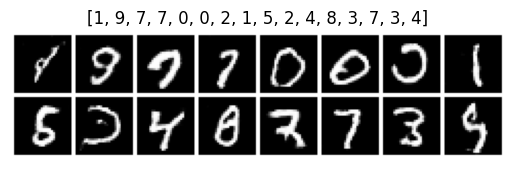

average prediction confidence over 1000 predictions: 0.5938858985900879
cumulative prediction counts: [6094, 3690, 3812, 5189, 3776, 3144, 1883, 7727, 7567, 9118]
epoch time: 17.5739004611969, total time: 894.544349193573
Epoch [53/100] Batch [1/469] Discriminator Loss: 0.7746 Generator Loss: 1.7204
Epoch [53/100] Batch [101/469] Discriminator Loss: 0.7056 Generator Loss: 1.9550
Epoch [53/100] Batch [201/469] Discriminator Loss: 0.7823 Generator Loss: 1.2505
Epoch [53/100] Batch [301/469] Discriminator Loss: 0.8601 Generator Loss: 1.4492
Epoch [53/100] Batch [401/469] Discriminator Loss: 0.9115 Generator Loss: 1.2236


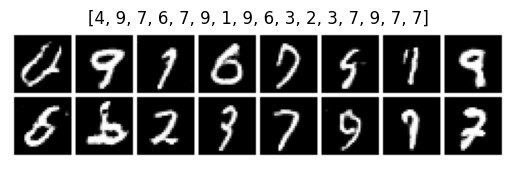

average prediction confidence over 1000 predictions: 0.5890836715698242
cumulative prediction counts: [6226, 3746, 3884, 5269, 3865, 3189, 1918, 7926, 7686, 9291]
epoch time: 16.954615592956543, total time: 911.4989647865295
Epoch [54/100] Batch [1/469] Discriminator Loss: 1.2882 Generator Loss: 0.8793
Epoch [54/100] Batch [101/469] Discriminator Loss: 0.8345 Generator Loss: 1.8800
Epoch [54/100] Batch [201/469] Discriminator Loss: 0.7629 Generator Loss: 2.1883
Epoch [54/100] Batch [301/469] Discriminator Loss: 0.7331 Generator Loss: 1.5923
Epoch [54/100] Batch [401/469] Discriminator Loss: 1.0403 Generator Loss: 0.9732


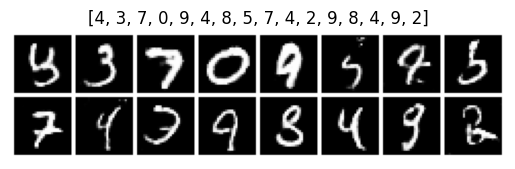

average prediction confidence over 1000 predictions: 0.5896874070167542
cumulative prediction counts: [6349, 3810, 3950, 5343, 3950, 3229, 1946, 8096, 7821, 9506]
epoch time: 17.835493564605713, total time: 929.3344583511353
Epoch [55/100] Batch [1/469] Discriminator Loss: 0.7622 Generator Loss: 1.5486
Epoch [55/100] Batch [101/469] Discriminator Loss: 0.7668 Generator Loss: 1.7125
Epoch [55/100] Batch [201/469] Discriminator Loss: 0.7657 Generator Loss: 1.3037
Epoch [55/100] Batch [301/469] Discriminator Loss: 0.8397 Generator Loss: 1.9137
Epoch [55/100] Batch [401/469] Discriminator Loss: 0.7455 Generator Loss: 2.1413


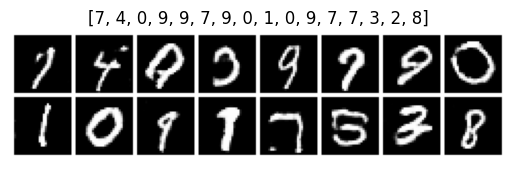

average prediction confidence over 1000 predictions: 0.5989298224449158
cumulative prediction counts: [6492, 3865, 4006, 5435, 4030, 3264, 1963, 8281, 7951, 9713]
epoch time: 16.97276496887207, total time: 946.3072233200073
Epoch [56/100] Batch [1/469] Discriminator Loss: 0.7614 Generator Loss: 1.0583
Epoch [56/100] Batch [101/469] Discriminator Loss: 0.8512 Generator Loss: 1.2127
Epoch [56/100] Batch [201/469] Discriminator Loss: 0.9243 Generator Loss: 2.6865
Epoch [56/100] Batch [301/469] Discriminator Loss: 0.7828 Generator Loss: 2.0381
Epoch [56/100] Batch [401/469] Discriminator Loss: 0.8675 Generator Loss: 1.4211


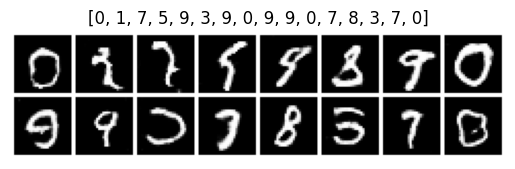

average prediction confidence over 1000 predictions: 0.5958935618400574
cumulative prediction counts: [6636, 3935, 4069, 5514, 4105, 3298, 1987, 8460, 8085, 9911]
epoch time: 16.893498420715332, total time: 963.2007217407227
Epoch [57/100] Batch [1/469] Discriminator Loss: 0.8481 Generator Loss: 1.1517
Epoch [57/100] Batch [101/469] Discriminator Loss: 0.7083 Generator Loss: 1.5207
Epoch [57/100] Batch [201/469] Discriminator Loss: 1.0193 Generator Loss: 2.3798
Epoch [57/100] Batch [301/469] Discriminator Loss: 0.7057 Generator Loss: 1.6987
Epoch [57/100] Batch [401/469] Discriminator Loss: 0.9506 Generator Loss: 1.0142


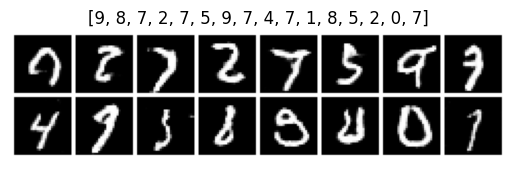

average prediction confidence over 1000 predictions: 0.5969022512435913
cumulative prediction counts: [6757, 3995, 4132, 5603, 4199, 3337, 2011, 8652, 8207, 10107]
epoch time: 17.80466628074646, total time: 981.0053880214691
Epoch [58/100] Batch [1/469] Discriminator Loss: 0.7389 Generator Loss: 2.0616
Epoch [58/100] Batch [101/469] Discriminator Loss: 0.8246 Generator Loss: 2.2850
Epoch [58/100] Batch [201/469] Discriminator Loss: 0.8096 Generator Loss: 1.9768
Epoch [58/100] Batch [301/469] Discriminator Loss: 0.8923 Generator Loss: 1.4700
Epoch [58/100] Batch [401/469] Discriminator Loss: 0.8489 Generator Loss: 1.4856


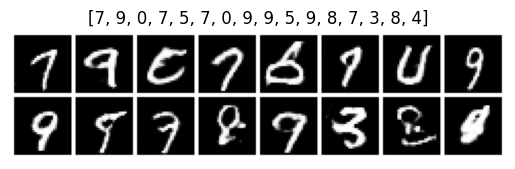

average prediction confidence over 1000 predictions: 0.5973510146141052
cumulative prediction counts: [6888, 4055, 4197, 5674, 4284, 3379, 2033, 8847, 8327, 10316]
epoch time: 16.960753679275513, total time: 997.9661417007446
Epoch [59/100] Batch [1/469] Discriminator Loss: 0.7582 Generator Loss: 1.4096
Epoch [59/100] Batch [101/469] Discriminator Loss: 0.8679 Generator Loss: 2.0594
Epoch [59/100] Batch [201/469] Discriminator Loss: 1.1180 Generator Loss: 1.0729
Epoch [59/100] Batch [301/469] Discriminator Loss: 0.8755 Generator Loss: 1.0613
Epoch [59/100] Batch [401/469] Discriminator Loss: 0.7642 Generator Loss: 1.0154


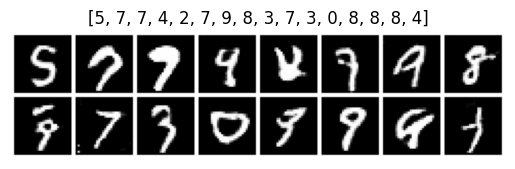

average prediction confidence over 1000 predictions: 0.5973427295684814
cumulative prediction counts: [7008, 4124, 4264, 5737, 4366, 3422, 2048, 9051, 8470, 10510]
epoch time: 17.63242793083191, total time: 1015.5985696315765
Epoch [60/100] Batch [1/469] Discriminator Loss: 0.7174 Generator Loss: 1.8314
Epoch [60/100] Batch [101/469] Discriminator Loss: 0.7545 Generator Loss: 1.4298
Epoch [60/100] Batch [201/469] Discriminator Loss: 0.6890 Generator Loss: 1.7759
Epoch [60/100] Batch [301/469] Discriminator Loss: 0.8057 Generator Loss: 1.1654
Epoch [60/100] Batch [401/469] Discriminator Loss: 0.9229 Generator Loss: 1.0408


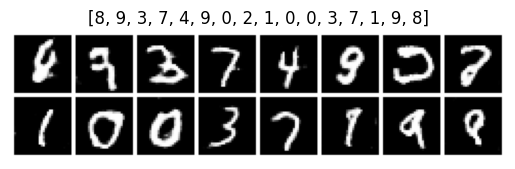

average prediction confidence over 1000 predictions: 0.6000654101371765
cumulative prediction counts: [7144, 4195, 4308, 5823, 4451, 3466, 2076, 9230, 8580, 10727]
epoch time: 17.047573566436768, total time: 1032.6461431980133
Epoch [61/100] Batch [1/469] Discriminator Loss: 0.7938 Generator Loss: 1.5346
Epoch [61/100] Batch [101/469] Discriminator Loss: 0.8055 Generator Loss: 1.7074
Epoch [61/100] Batch [201/469] Discriminator Loss: 0.8695 Generator Loss: 2.1102
Epoch [61/100] Batch [301/469] Discriminator Loss: 0.7583 Generator Loss: 1.2886
Epoch [61/100] Batch [401/469] Discriminator Loss: 0.7612 Generator Loss: 1.6634


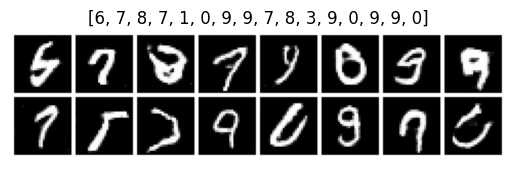

average prediction confidence over 1000 predictions: 0.6003193259239197
cumulative prediction counts: [7287, 4254, 4366, 5899, 4533, 3501, 2107, 9424, 8713, 10916]
epoch time: 16.9130380153656, total time: 1049.559181213379
Epoch [62/100] Batch [1/469] Discriminator Loss: 0.8396 Generator Loss: 0.9817
Epoch [62/100] Batch [101/469] Discriminator Loss: 0.7782 Generator Loss: 1.4128
Epoch [62/100] Batch [201/469] Discriminator Loss: 0.7240 Generator Loss: 1.7378
Epoch [62/100] Batch [301/469] Discriminator Loss: 0.7989 Generator Loss: 1.4677
Epoch [62/100] Batch [401/469] Discriminator Loss: 0.6973 Generator Loss: 1.7122


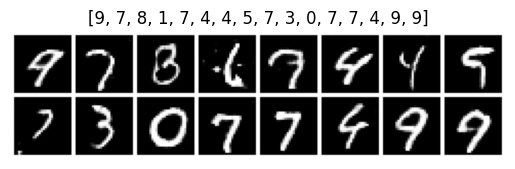

average prediction confidence over 1000 predictions: 0.602192223072052
cumulative prediction counts: [7410, 4331, 4420, 5980, 4610, 3538, 2133, 9624, 8832, 11122]
epoch time: 17.656972408294678, total time: 1067.2161536216736
Epoch [63/100] Batch [1/469] Discriminator Loss: 0.7694 Generator Loss: 2.1928
Epoch [63/100] Batch [101/469] Discriminator Loss: 0.8453 Generator Loss: 1.9681
Epoch [63/100] Batch [201/469] Discriminator Loss: 0.9639 Generator Loss: 2.0659
Epoch [63/100] Batch [301/469] Discriminator Loss: 0.6408 Generator Loss: 1.7767
Epoch [63/100] Batch [401/469] Discriminator Loss: 0.7554 Generator Loss: 1.5972


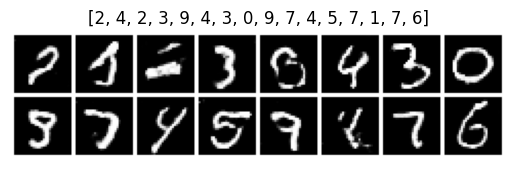

average prediction confidence over 1000 predictions: 0.6019582748413086
cumulative prediction counts: [7527, 4411, 4479, 6066, 4696, 3586, 2165, 9808, 8931, 11331]
epoch time: 16.933871507644653, total time: 1084.1500251293182
Epoch [64/100] Batch [1/469] Discriminator Loss: 0.6859 Generator Loss: 2.2387
Epoch [64/100] Batch [101/469] Discriminator Loss: 0.7860 Generator Loss: 1.7877
Epoch [64/100] Batch [201/469] Discriminator Loss: 0.8512 Generator Loss: 1.8254
Epoch [64/100] Batch [301/469] Discriminator Loss: 0.7414 Generator Loss: 2.2528
Epoch [64/100] Batch [401/469] Discriminator Loss: 0.7773 Generator Loss: 1.9420


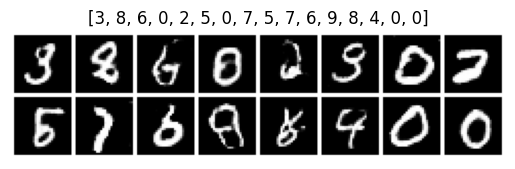

average prediction confidence over 1000 predictions: 0.5985937714576721
cumulative prediction counts: [7669, 4477, 4536, 6143, 4777, 3620, 2189, 10000, 9040, 11549]
epoch time: 17.57736086845398, total time: 1101.7273859977722
Epoch [65/100] Batch [1/469] Discriminator Loss: 0.8581 Generator Loss: 1.4000
Epoch [65/100] Batch [101/469] Discriminator Loss: 0.9300 Generator Loss: 1.0610
Epoch [65/100] Batch [201/469] Discriminator Loss: 0.7085 Generator Loss: 1.6856
Epoch [65/100] Batch [301/469] Discriminator Loss: 0.8522 Generator Loss: 2.7240
Epoch [65/100] Batch [401/469] Discriminator Loss: 0.8217 Generator Loss: 1.7165


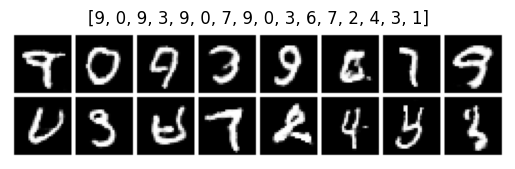

average prediction confidence over 1000 predictions: 0.5923412442207336
cumulative prediction counts: [7807, 4554, 4594, 6209, 4872, 3663, 2206, 10194, 9165, 11736]
epoch time: 16.909854650497437, total time: 1118.6372406482697
Epoch [66/100] Batch [1/469] Discriminator Loss: 0.7180 Generator Loss: 2.5812
Epoch [66/100] Batch [101/469] Discriminator Loss: 0.8870 Generator Loss: 2.2007
Epoch [66/100] Batch [201/469] Discriminator Loss: 0.7843 Generator Loss: 1.8154
Epoch [66/100] Batch [301/469] Discriminator Loss: 0.8549 Generator Loss: 1.5583
Epoch [66/100] Batch [401/469] Discriminator Loss: 0.8008 Generator Loss: 1.6323


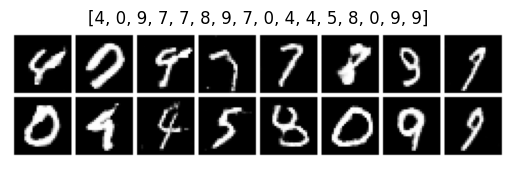

average prediction confidence over 1000 predictions: 0.6060874462127686
cumulative prediction counts: [7958, 4625, 4651, 6287, 4966, 3695, 2226, 10367, 9284, 11941]
epoch time: 17.122878074645996, total time: 1135.7601187229156
Epoch [67/100] Batch [1/469] Discriminator Loss: 0.7532 Generator Loss: 1.6244
Epoch [67/100] Batch [101/469] Discriminator Loss: 0.8161 Generator Loss: 1.3441
Epoch [67/100] Batch [201/469] Discriminator Loss: 1.0336 Generator Loss: 0.9397
Epoch [67/100] Batch [301/469] Discriminator Loss: 0.7548 Generator Loss: 1.5230
Epoch [67/100] Batch [401/469] Discriminator Loss: 1.0017 Generator Loss: 1.0463


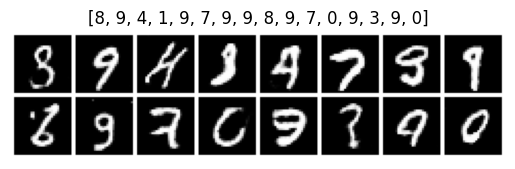

average prediction confidence over 1000 predictions: 0.5977931022644043
cumulative prediction counts: [8079, 4697, 4698, 6359, 5064, 3732, 2249, 10571, 9401, 12150]
epoch time: 17.371400594711304, total time: 1153.131519317627
Epoch [68/100] Batch [1/469] Discriminator Loss: 0.8569 Generator Loss: 2.6666
Epoch [68/100] Batch [101/469] Discriminator Loss: 0.9387 Generator Loss: 1.1971
Epoch [68/100] Batch [201/469] Discriminator Loss: 0.8423 Generator Loss: 1.2369
Epoch [68/100] Batch [301/469] Discriminator Loss: 0.8195 Generator Loss: 1.3510
Epoch [68/100] Batch [401/469] Discriminator Loss: 0.7235 Generator Loss: 1.8646


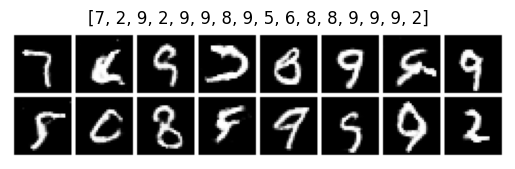

average prediction confidence over 1000 predictions: 0.5936626195907593
cumulative prediction counts: [8233, 4763, 4754, 6432, 5160, 3764, 2268, 10766, 9505, 12355]
epoch time: 16.817856550216675, total time: 1169.9493758678436
Epoch [69/100] Batch [1/469] Discriminator Loss: 0.7872 Generator Loss: 1.9132
Epoch [69/100] Batch [101/469] Discriminator Loss: 0.8151 Generator Loss: 1.2955
Epoch [69/100] Batch [201/469] Discriminator Loss: 0.8131 Generator Loss: 1.6617
Epoch [69/100] Batch [301/469] Discriminator Loss: 0.8040 Generator Loss: 1.3673
Epoch [69/100] Batch [401/469] Discriminator Loss: 0.7291 Generator Loss: 1.7100


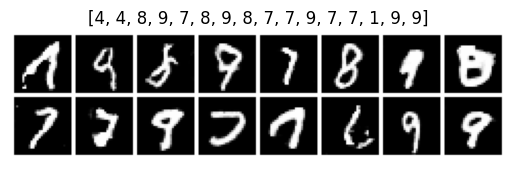

average prediction confidence over 1000 predictions: 0.6038599014282227
cumulative prediction counts: [8368, 4832, 4800, 6520, 5239, 3800, 2287, 10977, 9614, 12563]
epoch time: 17.576455116271973, total time: 1187.5258309841156
Epoch [70/100] Batch [1/469] Discriminator Loss: 0.7541 Generator Loss: 1.6907
Epoch [70/100] Batch [101/469] Discriminator Loss: 0.8653 Generator Loss: 2.1476
Epoch [70/100] Batch [201/469] Discriminator Loss: 0.8010 Generator Loss: 1.6484
Epoch [70/100] Batch [301/469] Discriminator Loss: 0.7322 Generator Loss: 1.7131
Epoch [70/100] Batch [401/469] Discriminator Loss: 0.6929 Generator Loss: 2.1400


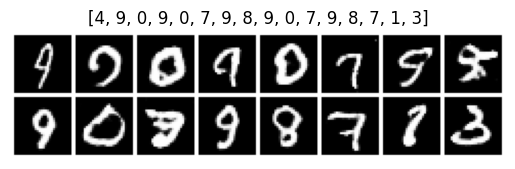

average prediction confidence over 1000 predictions: 0.613122284412384
cumulative prediction counts: [8511, 4895, 4865, 6591, 5311, 3832, 2303, 11182, 9713, 12797]
epoch time: 16.757786512374878, total time: 1204.2836174964905
Epoch [71/100] Batch [1/469] Discriminator Loss: 0.7224 Generator Loss: 1.5548
Epoch [71/100] Batch [101/469] Discriminator Loss: 0.7495 Generator Loss: 1.9260
Epoch [71/100] Batch [201/469] Discriminator Loss: 0.7582 Generator Loss: 1.4983
Epoch [71/100] Batch [301/469] Discriminator Loss: 0.7820 Generator Loss: 1.3912
Epoch [71/100] Batch [401/469] Discriminator Loss: 0.9595 Generator Loss: 1.0029


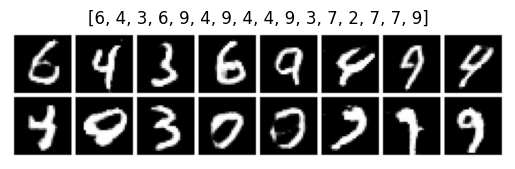

average prediction confidence over 1000 predictions: 0.6050189733505249
cumulative prediction counts: [8653, 4984, 4920, 6656, 5389, 3870, 2324, 11386, 9813, 13005]
epoch time: 16.903841495513916, total time: 1221.1874589920044
Epoch [72/100] Batch [1/469] Discriminator Loss: 0.7093 Generator Loss: 1.4003
Epoch [72/100] Batch [101/469] Discriminator Loss: 0.8987 Generator Loss: 1.1723
Epoch [72/100] Batch [201/469] Discriminator Loss: 1.1025 Generator Loss: 0.9132
Epoch [72/100] Batch [301/469] Discriminator Loss: 0.8102 Generator Loss: 1.1706
Epoch [72/100] Batch [401/469] Discriminator Loss: 0.7447 Generator Loss: 1.9960


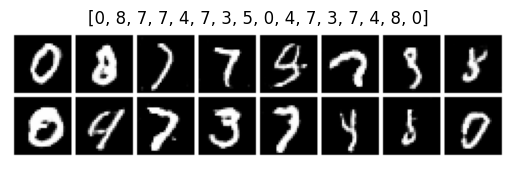

average prediction confidence over 1000 predictions: 0.6154569387435913
cumulative prediction counts: [8792, 5039, 4986, 6724, 5476, 3905, 2348, 11601, 9918, 13211]
epoch time: 17.524385929107666, total time: 1238.711844921112
Epoch [73/100] Batch [1/469] Discriminator Loss: 0.8471 Generator Loss: 1.6992
Epoch [73/100] Batch [101/469] Discriminator Loss: 0.7912 Generator Loss: 1.2472
Epoch [73/100] Batch [201/469] Discriminator Loss: 0.8120 Generator Loss: 1.1844
Epoch [73/100] Batch [301/469] Discriminator Loss: 0.6510 Generator Loss: 1.7764
Epoch [73/100] Batch [401/469] Discriminator Loss: 0.7616 Generator Loss: 1.4439


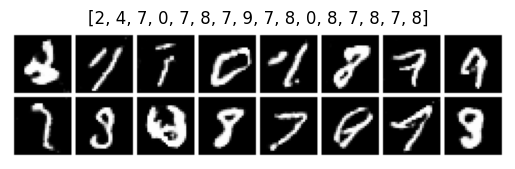

average prediction confidence over 1000 predictions: 0.5979598760604858
cumulative prediction counts: [8933, 5122, 5047, 6807, 5554, 3932, 2366, 11798, 10034, 13407]
epoch time: 16.989620685577393, total time: 1255.7014656066895
Epoch [74/100] Batch [1/469] Discriminator Loss: 0.7459 Generator Loss: 1.3951
Epoch [74/100] Batch [101/469] Discriminator Loss: 0.8117 Generator Loss: 2.2743
Epoch [74/100] Batch [201/469] Discriminator Loss: 0.7947 Generator Loss: 2.0040
Epoch [74/100] Batch [301/469] Discriminator Loss: 0.7905 Generator Loss: 1.4197
Epoch [74/100] Batch [401/469] Discriminator Loss: 0.7122 Generator Loss: 1.6101


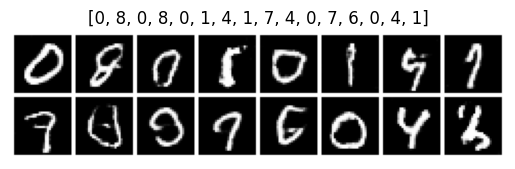

average prediction confidence over 1000 predictions: 0.6097254753112793
cumulative prediction counts: [9077, 5195, 5110, 6880, 5656, 3959, 2391, 11977, 10137, 13618]
epoch time: 16.910637855529785, total time: 1272.6121034622192
Epoch [75/100] Batch [1/469] Discriminator Loss: 0.7551 Generator Loss: 2.2216
Epoch [75/100] Batch [101/469] Discriminator Loss: 0.8482 Generator Loss: 1.1813
Epoch [75/100] Batch [201/469] Discriminator Loss: 0.7365 Generator Loss: 1.5834
Epoch [75/100] Batch [301/469] Discriminator Loss: 0.7624 Generator Loss: 1.8701
Epoch [75/100] Batch [401/469] Discriminator Loss: 0.7958 Generator Loss: 1.5395


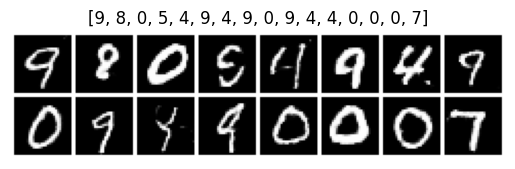

average prediction confidence over 1000 predictions: 0.6002369523048401
cumulative prediction counts: [9209, 5270, 5164, 6948, 5757, 3998, 2410, 12161, 10247, 13836]
epoch time: 17.35433053970337, total time: 1289.9664340019226
Epoch [76/100] Batch [1/469] Discriminator Loss: 0.7642 Generator Loss: 1.6551
Epoch [76/100] Batch [101/469] Discriminator Loss: 0.7595 Generator Loss: 1.6688
Epoch [76/100] Batch [201/469] Discriminator Loss: 0.8659 Generator Loss: 1.3022
Epoch [76/100] Batch [301/469] Discriminator Loss: 0.7924 Generator Loss: 1.2998
Epoch [76/100] Batch [401/469] Discriminator Loss: 0.8066 Generator Loss: 1.5538


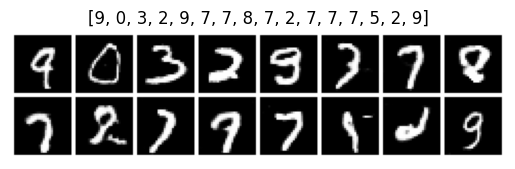

average prediction confidence over 1000 predictions: 0.6219973564147949
cumulative prediction counts: [9348, 5332, 5224, 7020, 5856, 4034, 2428, 12380, 10334, 14044]
epoch time: 16.934174299240112, total time: 1306.9006083011627
Epoch [77/100] Batch [1/469] Discriminator Loss: 0.7963 Generator Loss: 1.7874
Epoch [77/100] Batch [101/469] Discriminator Loss: 0.7052 Generator Loss: 2.1327
Epoch [77/100] Batch [201/469] Discriminator Loss: 0.6934 Generator Loss: 2.1775
Epoch [77/100] Batch [301/469] Discriminator Loss: 0.7547 Generator Loss: 1.7203
Epoch [77/100] Batch [401/469] Discriminator Loss: 0.7412 Generator Loss: 1.6332


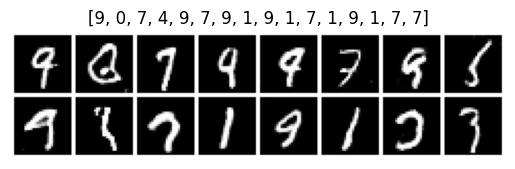

average prediction confidence over 1000 predictions: 0.6156187057495117
cumulative prediction counts: [9502, 5393, 5262, 7094, 5950, 4063, 2442, 12592, 10432, 14270]
epoch time: 17.519515991210938, total time: 1324.4201242923737
Epoch [78/100] Batch [1/469] Discriminator Loss: 0.7902 Generator Loss: 1.3141
Epoch [78/100] Batch [101/469] Discriminator Loss: 0.7926 Generator Loss: 1.5542
Epoch [78/100] Batch [201/469] Discriminator Loss: 0.7723 Generator Loss: 1.4536
Epoch [78/100] Batch [301/469] Discriminator Loss: 0.7540 Generator Loss: 1.7999
Epoch [78/100] Batch [401/469] Discriminator Loss: 0.7822 Generator Loss: 1.6962


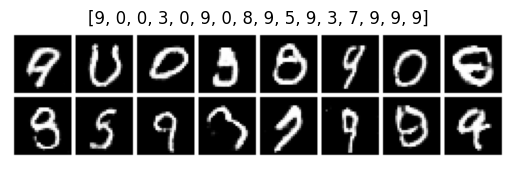

average prediction confidence over 1000 predictions: 0.5990927219390869
cumulative prediction counts: [9641, 5440, 5314, 7178, 6044, 4092, 2463, 12808, 10549, 14471]
epoch time: 16.717397689819336, total time: 1341.137521982193
Epoch [79/100] Batch [1/469] Discriminator Loss: 0.6861 Generator Loss: 1.8578
Epoch [79/100] Batch [101/469] Discriminator Loss: 0.7821 Generator Loss: 1.5802
Epoch [79/100] Batch [201/469] Discriminator Loss: 0.8108 Generator Loss: 1.5358
Epoch [79/100] Batch [301/469] Discriminator Loss: 0.6952 Generator Loss: 1.4957
Epoch [79/100] Batch [401/469] Discriminator Loss: 0.7912 Generator Loss: 1.6830


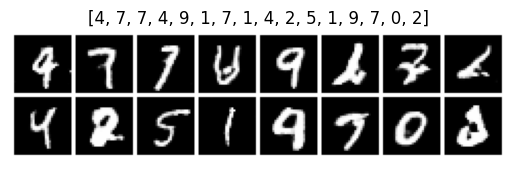

average prediction confidence over 1000 predictions: 0.617470383644104
cumulative prediction counts: [9773, 5528, 5381, 7240, 6143, 4122, 2474, 13025, 10637, 14677]
epoch time: 16.75874423980713, total time: 1357.8962662220001
Epoch [80/100] Batch [1/469] Discriminator Loss: 1.0426 Generator Loss: 2.8450
Epoch [80/100] Batch [101/469] Discriminator Loss: 0.7896 Generator Loss: 1.7304
Epoch [80/100] Batch [201/469] Discriminator Loss: 0.7735 Generator Loss: 2.3065
Epoch [80/100] Batch [301/469] Discriminator Loss: 0.8036 Generator Loss: 1.3091
Epoch [80/100] Batch [401/469] Discriminator Loss: 0.7081 Generator Loss: 2.1929


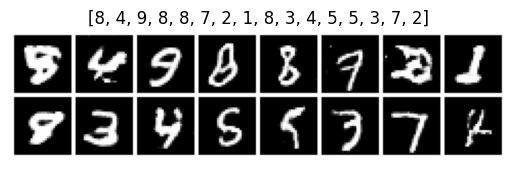

average prediction confidence over 1000 predictions: 0.6218379139900208
cumulative prediction counts: [9907, 5604, 5452, 7298, 6234, 4162, 2487, 13228, 10732, 14896]
epoch time: 17.59667992591858, total time: 1375.4929461479187
Epoch [81/100] Batch [1/469] Discriminator Loss: 0.6551 Generator Loss: 1.5115
Epoch [81/100] Batch [101/469] Discriminator Loss: 0.6259 Generator Loss: 1.5134
Epoch [81/100] Batch [201/469] Discriminator Loss: 0.8084 Generator Loss: 2.0953
Epoch [81/100] Batch [301/469] Discriminator Loss: 0.9689 Generator Loss: 1.2171
Epoch [81/100] Batch [401/469] Discriminator Loss: 0.8129 Generator Loss: 2.2178


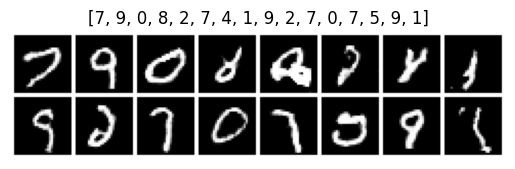

average prediction confidence over 1000 predictions: 0.6225113868713379
cumulative prediction counts: [10061, 5663, 5512, 7374, 6313, 4199, 2501, 13437, 10832, 15108]
epoch time: 16.778356552124023, total time: 1392.2713027000427
Epoch [82/100] Batch [1/469] Discriminator Loss: 0.7466 Generator Loss: 1.8578
Epoch [82/100] Batch [101/469] Discriminator Loss: 0.7728 Generator Loss: 1.4689
Epoch [82/100] Batch [201/469] Discriminator Loss: 0.7503 Generator Loss: 1.2275
Epoch [82/100] Batch [301/469] Discriminator Loss: 0.9281 Generator Loss: 1.2059
Epoch [82/100] Batch [401/469] Discriminator Loss: 0.8483 Generator Loss: 1.8209


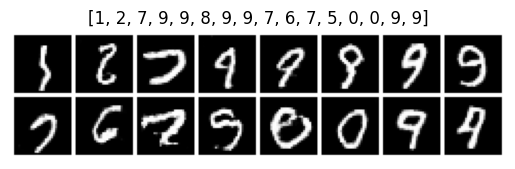

average prediction confidence over 1000 predictions: 0.61985844373703
cumulative prediction counts: [10203, 5710, 5573, 7434, 6424, 4249, 2515, 13633, 10935, 15324]
epoch time: 17.614511728286743, total time: 1409.8858144283295
Epoch [83/100] Batch [1/469] Discriminator Loss: 0.6602 Generator Loss: 1.4962
Epoch [83/100] Batch [101/469] Discriminator Loss: 0.6936 Generator Loss: 1.5947
Epoch [83/100] Batch [201/469] Discriminator Loss: 0.7678 Generator Loss: 1.1035
Epoch [83/100] Batch [301/469] Discriminator Loss: 0.7845 Generator Loss: 1.5695
Epoch [83/100] Batch [401/469] Discriminator Loss: 0.8955 Generator Loss: 3.0077


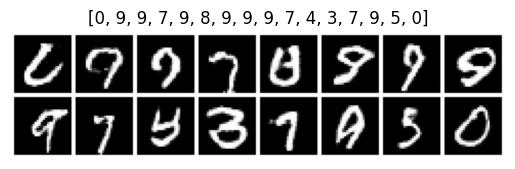

average prediction confidence over 1000 predictions: 0.6210734844207764
cumulative prediction counts: [10338, 5768, 5632, 7503, 6508, 4277, 2532, 13846, 11053, 15543]
epoch time: 16.945494174957275, total time: 1426.8313086032867
Epoch [84/100] Batch [1/469] Discriminator Loss: 0.7058 Generator Loss: 1.6532
Epoch [84/100] Batch [101/469] Discriminator Loss: 0.7433 Generator Loss: 1.9241
Epoch [84/100] Batch [201/469] Discriminator Loss: 0.6370 Generator Loss: 2.1160
Epoch [84/100] Batch [301/469] Discriminator Loss: 0.8603 Generator Loss: 1.9993
Epoch [84/100] Batch [401/469] Discriminator Loss: 0.6009 Generator Loss: 1.8985


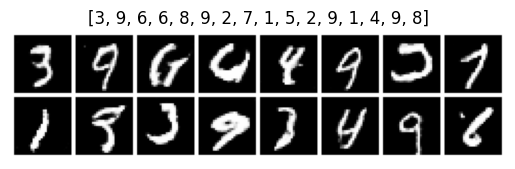

average prediction confidence over 1000 predictions: 0.6293993592262268
cumulative prediction counts: [10498, 5830, 5686, 7580, 6597, 4311, 2552, 14050, 11154, 15742]
epoch time: 16.89054298400879, total time: 1443.7218515872955
Epoch [85/100] Batch [1/469] Discriminator Loss: 0.8116 Generator Loss: 2.9672
Epoch [85/100] Batch [101/469] Discriminator Loss: 1.0421 Generator Loss: 2.1088
Epoch [85/100] Batch [201/469] Discriminator Loss: 0.7659 Generator Loss: 1.5613
Epoch [85/100] Batch [301/469] Discriminator Loss: 0.9003 Generator Loss: 1.0883
Epoch [85/100] Batch [401/469] Discriminator Loss: 0.6849 Generator Loss: 1.5885


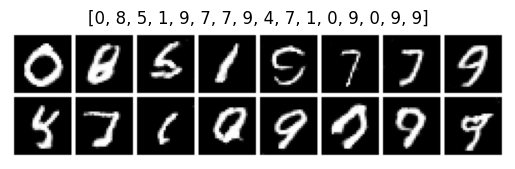

average prediction confidence over 1000 predictions: 0.6240458488464355
cumulative prediction counts: [10649, 5887, 5741, 7652, 6674, 4340, 2571, 14258, 11264, 15964]
epoch time: 17.765408992767334, total time: 1461.4872605800629
Epoch [86/100] Batch [1/469] Discriminator Loss: 0.8133 Generator Loss: 1.8911
Epoch [86/100] Batch [101/469] Discriminator Loss: 0.6336 Generator Loss: 1.8600
Epoch [86/100] Batch [201/469] Discriminator Loss: 0.8723 Generator Loss: 1.6542
Epoch [86/100] Batch [301/469] Discriminator Loss: 0.8838 Generator Loss: 1.3356
Epoch [86/100] Batch [401/469] Discriminator Loss: 0.7685 Generator Loss: 2.4299


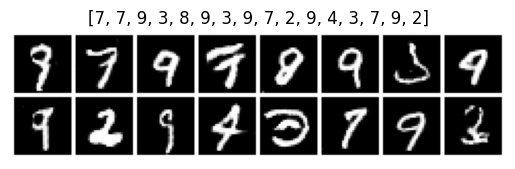

average prediction confidence over 1000 predictions: 0.6122795343399048
cumulative prediction counts: [10788, 5961, 5797, 7712, 6774, 4378, 2587, 14463, 11346, 16194]
epoch time: 16.851886987686157, total time: 1478.339147567749
Epoch [87/100] Batch [1/469] Discriminator Loss: 0.8375 Generator Loss: 2.0264
Epoch [87/100] Batch [101/469] Discriminator Loss: 0.8168 Generator Loss: 1.1019
Epoch [87/100] Batch [201/469] Discriminator Loss: 0.7568 Generator Loss: 1.8526
Epoch [87/100] Batch [301/469] Discriminator Loss: 0.7554 Generator Loss: 1.7421
Epoch [87/100] Batch [401/469] Discriminator Loss: 0.7170 Generator Loss: 1.7223


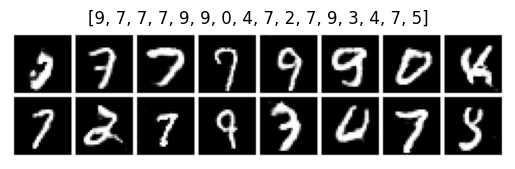

average prediction confidence over 1000 predictions: 0.6304737329483032
cumulative prediction counts: [10929, 6034, 5868, 7774, 6865, 4414, 2603, 14651, 11449, 16413]
epoch time: 17.72996711730957, total time: 1496.0691146850586
Epoch [88/100] Batch [1/469] Discriminator Loss: 0.7625 Generator Loss: 1.6941
Epoch [88/100] Batch [101/469] Discriminator Loss: 0.6442 Generator Loss: 1.6617
Epoch [88/100] Batch [201/469] Discriminator Loss: 0.7301 Generator Loss: 1.2842
Epoch [88/100] Batch [301/469] Discriminator Loss: 0.7944 Generator Loss: 2.1113
Epoch [88/100] Batch [401/469] Discriminator Loss: 0.9282 Generator Loss: 3.0464


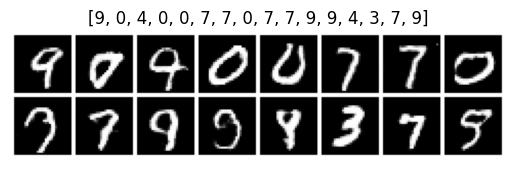

average prediction confidence over 1000 predictions: 0.6100653409957886
cumulative prediction counts: [11077, 6099, 5924, 7842, 6937, 4452, 2619, 14875, 11538, 16637]
epoch time: 16.7988498210907, total time: 1512.8679645061493
Epoch [89/100] Batch [1/469] Discriminator Loss: 0.7359 Generator Loss: 1.9561
Epoch [89/100] Batch [101/469] Discriminator Loss: 0.6876 Generator Loss: 1.8303
Epoch [89/100] Batch [201/469] Discriminator Loss: 0.8532 Generator Loss: 1.1877
Epoch [89/100] Batch [301/469] Discriminator Loss: 1.0628 Generator Loss: 1.2741
Epoch [89/100] Batch [401/469] Discriminator Loss: 0.7596 Generator Loss: 2.3102


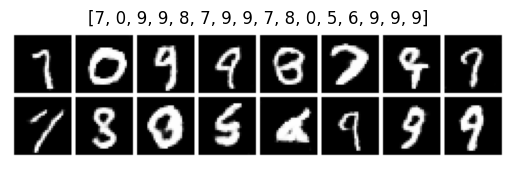

average prediction confidence over 1000 predictions: 0.616935670375824
cumulative prediction counts: [11209, 6160, 5971, 7912, 7027, 4482, 2645, 15096, 11631, 16867]
epoch time: 16.87044596672058, total time: 1529.7384104728699
Epoch [90/100] Batch [1/469] Discriminator Loss: 0.6622 Generator Loss: 1.6381
Epoch [90/100] Batch [101/469] Discriminator Loss: 0.5858 Generator Loss: 2.2204
Epoch [90/100] Batch [201/469] Discriminator Loss: 0.6597 Generator Loss: 1.2908
Epoch [90/100] Batch [301/469] Discriminator Loss: 0.6951 Generator Loss: 1.8826
Epoch [90/100] Batch [401/469] Discriminator Loss: 0.7551 Generator Loss: 1.8533


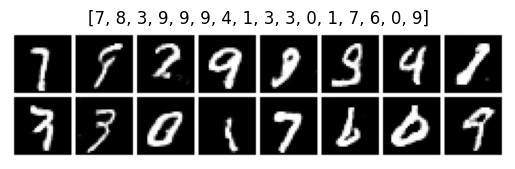

average prediction confidence over 1000 predictions: 0.6107056140899658
cumulative prediction counts: [11356, 6222, 6030, 7996, 7103, 4509, 2663, 15311, 11732, 17078]
epoch time: 17.356788396835327, total time: 1547.0951988697052
Epoch [91/100] Batch [1/469] Discriminator Loss: 1.3305 Generator Loss: 0.9597
Epoch [91/100] Batch [101/469] Discriminator Loss: 0.7794 Generator Loss: 1.5194
Epoch [91/100] Batch [201/469] Discriminator Loss: 0.8360 Generator Loss: 1.0861
Epoch [91/100] Batch [301/469] Discriminator Loss: 0.7056 Generator Loss: 2.3860
Epoch [91/100] Batch [401/469] Discriminator Loss: 0.7152 Generator Loss: 2.8093


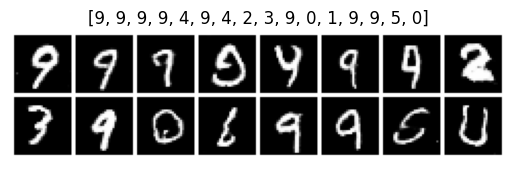

average prediction confidence over 1000 predictions: 0.6264728307723999
cumulative prediction counts: [11483, 6298, 6079, 8060, 7191, 4540, 2678, 15550, 11816, 17305]
epoch time: 16.867785215377808, total time: 1563.962984085083
Epoch [92/100] Batch [1/469] Discriminator Loss: 0.7455 Generator Loss: 1.3546
Epoch [92/100] Batch [101/469] Discriminator Loss: 0.8157 Generator Loss: 1.9164
Epoch [92/100] Batch [201/469] Discriminator Loss: 0.6886 Generator Loss: 2.1172
Epoch [92/100] Batch [301/469] Discriminator Loss: 0.7647 Generator Loss: 1.8995
Epoch [92/100] Batch [401/469] Discriminator Loss: 0.6785 Generator Loss: 1.6814


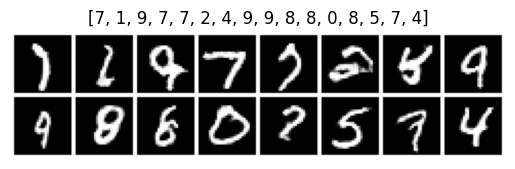

average prediction confidence over 1000 predictions: 0.6241997480392456
cumulative prediction counts: [11617, 6373, 6126, 8130, 7291, 4573, 2689, 15757, 11900, 17544]
epoch time: 17.6658616065979, total time: 1581.628845691681
Epoch [93/100] Batch [1/469] Discriminator Loss: 0.7765 Generator Loss: 1.0695
Epoch [93/100] Batch [101/469] Discriminator Loss: 0.7563 Generator Loss: 1.1265
Epoch [93/100] Batch [201/469] Discriminator Loss: 0.7222 Generator Loss: 2.1398
Epoch [93/100] Batch [301/469] Discriminator Loss: 0.7142 Generator Loss: 2.0943
Epoch [93/100] Batch [401/469] Discriminator Loss: 0.8549 Generator Loss: 2.4540


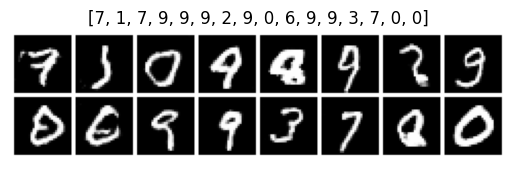

average prediction confidence over 1000 predictions: 0.6130415201187134
cumulative prediction counts: [11757, 6436, 6181, 8200, 7378, 4598, 2705, 15964, 12002, 17779]
epoch time: 16.987131595611572, total time: 1598.6159772872925
Epoch [94/100] Batch [1/469] Discriminator Loss: 0.7422 Generator Loss: 1.7595
Epoch [94/100] Batch [101/469] Discriminator Loss: 0.7267 Generator Loss: 2.2043
Epoch [94/100] Batch [201/469] Discriminator Loss: 0.8358 Generator Loss: 2.2186
Epoch [94/100] Batch [301/469] Discriminator Loss: 0.7289 Generator Loss: 1.3546
Epoch [94/100] Batch [401/469] Discriminator Loss: 0.9474 Generator Loss: 2.0874


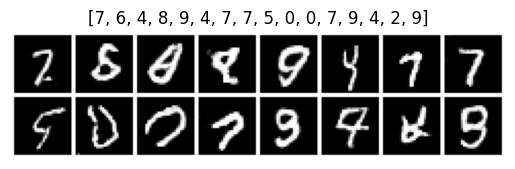

average prediction confidence over 1000 predictions: 0.6104882955551147
cumulative prediction counts: [11874, 6516, 6227, 8269, 7453, 4633, 2724, 16192, 12111, 18001]
epoch time: 16.808693408966064, total time: 1615.4246706962585
Epoch [95/100] Batch [1/469] Discriminator Loss: 0.6998 Generator Loss: 2.4323
Epoch [95/100] Batch [101/469] Discriminator Loss: 0.7944 Generator Loss: 1.3896
Epoch [95/100] Batch [201/469] Discriminator Loss: 0.7664 Generator Loss: 1.6585
Epoch [95/100] Batch [301/469] Discriminator Loss: 0.6681 Generator Loss: 1.8369
Epoch [95/100] Batch [401/469] Discriminator Loss: 0.6929 Generator Loss: 1.4280


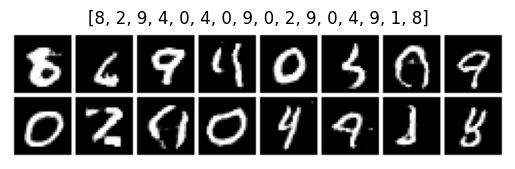

average prediction confidence over 1000 predictions: 0.6210988163948059
cumulative prediction counts: [12010, 6599, 6282, 8327, 7550, 4659, 2738, 16413, 12208, 18214]
epoch time: 17.814785480499268, total time: 1633.2394561767578
Epoch [96/100] Batch [1/469] Discriminator Loss: 0.7065 Generator Loss: 1.4956
Epoch [96/100] Batch [101/469] Discriminator Loss: 0.7485 Generator Loss: 1.2791
Epoch [96/100] Batch [201/469] Discriminator Loss: 0.7799 Generator Loss: 2.0157
Epoch [96/100] Batch [301/469] Discriminator Loss: 0.7170 Generator Loss: 1.8932
Epoch [96/100] Batch [401/469] Discriminator Loss: 0.6859 Generator Loss: 1.6074


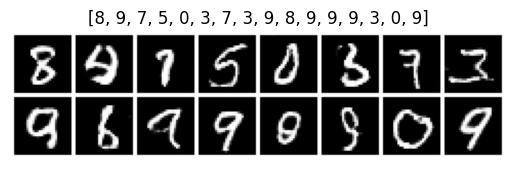

average prediction confidence over 1000 predictions: 0.6280702948570251
cumulative prediction counts: [12165, 6677, 6331, 8389, 7637, 4679, 2748, 16642, 12290, 18442]
epoch time: 16.968289136886597, total time: 1650.2077453136444
Epoch [97/100] Batch [1/469] Discriminator Loss: 0.6650 Generator Loss: 1.8586
Epoch [97/100] Batch [101/469] Discriminator Loss: 0.7621 Generator Loss: 1.8983
Epoch [97/100] Batch [201/469] Discriminator Loss: 0.7652 Generator Loss: 1.5588
Epoch [97/100] Batch [301/469] Discriminator Loss: 0.8427 Generator Loss: 1.2576
Epoch [97/100] Batch [401/469] Discriminator Loss: 0.8201 Generator Loss: 1.4913


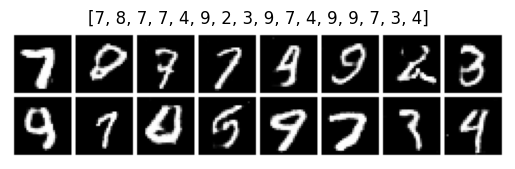

average prediction confidence over 1000 predictions: 0.6297367215156555
cumulative prediction counts: [12313, 6751, 6373, 8450, 7727, 4708, 2763, 16874, 12377, 18664]
epoch time: 17.174202919006348, total time: 1667.3819482326508
Epoch [98/100] Batch [1/469] Discriminator Loss: 0.6302 Generator Loss: 1.6133
Epoch [98/100] Batch [101/469] Discriminator Loss: 0.7815 Generator Loss: 1.7760
Epoch [98/100] Batch [201/469] Discriminator Loss: 0.9156 Generator Loss: 1.3641
Epoch [98/100] Batch [301/469] Discriminator Loss: 0.6135 Generator Loss: 2.4178
Epoch [98/100] Batch [401/469] Discriminator Loss: 0.6737 Generator Loss: 1.5841


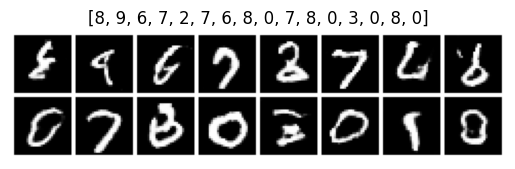

average prediction confidence over 1000 predictions: 0.618337094783783
cumulative prediction counts: [12458, 6829, 6432, 8512, 7803, 4735, 2779, 17088, 12473, 18891]
epoch time: 17.111974477767944, total time: 1684.4939227104187
Epoch [99/100] Batch [1/469] Discriminator Loss: 0.7339 Generator Loss: 1.6262
Epoch [99/100] Batch [101/469] Discriminator Loss: 0.7663 Generator Loss: 2.7144
Epoch [99/100] Batch [201/469] Discriminator Loss: 0.8219 Generator Loss: 1.7225
Epoch [99/100] Batch [301/469] Discriminator Loss: 0.7339 Generator Loss: 1.7066
Epoch [99/100] Batch [401/469] Discriminator Loss: 0.7040 Generator Loss: 2.2204


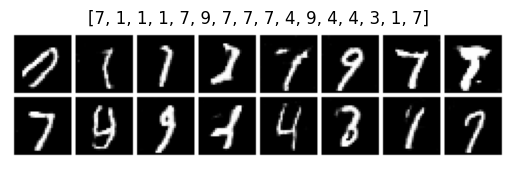

average prediction confidence over 1000 predictions: 0.6222817301750183
cumulative prediction counts: [12602, 6894, 6480, 8563, 7894, 4764, 2800, 17327, 12564, 19112]
epoch time: 16.942181825637817, total time: 1701.4361045360565
Epoch [100/100] Batch [1/469] Discriminator Loss: 0.7132 Generator Loss: 1.3119
Epoch [100/100] Batch [101/469] Discriminator Loss: 0.6972 Generator Loss: 1.6544
Epoch [100/100] Batch [201/469] Discriminator Loss: 0.8633 Generator Loss: 1.3628
Epoch [100/100] Batch [301/469] Discriminator Loss: 0.7553 Generator Loss: 2.2471
Epoch [100/100] Batch [401/469] Discriminator Loss: 0.7560 Generator Loss: 1.8963


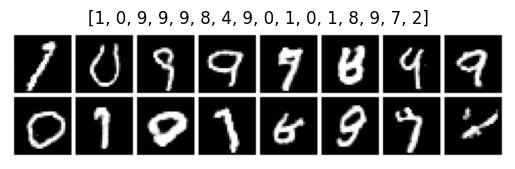

average prediction confidence over 1000 predictions: 0.6214253306388855
cumulative prediction counts: [12735, 6959, 6530, 8621, 7979, 4791, 2815, 17568, 12661, 19341]
epoch time: 17.53541326522827, total time: 1718.9715178012848


In [5]:
#OK now we have a good model for analyzing the output from our GAN
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set random seed for reproducibility
#torch.manual_seed(42)

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.fc = nn.Linear(100, 7 * 7 * 128)
        self.conv1 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1)

        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 128, 7, 7)
        x = self.relu(self.conv1(x))
        x = self.tanh(self.conv2(x))
        return x

# Define the discriminator network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.conv1 = nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1)
        self.fc = nn.Linear(7 * 7 * 128, 1)

        self.relu = nn.LeakyReLU(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = x.view(-1, 7 * 7 * 128)
        x = self.sigmoid(self.fc(x))
        return x

# Instantiate the generator and discriminator networks
generator = Generator()
discriminator = Discriminator()

# Define the loss function and optimizer
criterion = nn.BCELoss()
generator_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Load the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
dataset = datasets.MNIST('data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# Define the number of epochs and the device to use
num_epochs = 100
device = torch.device('cuda')

# Move the generator and discriminator networks to the device
generator.to(device)
discriminator.to(device)

# average of all confidences of predictions per epoch
confidences = []
counts = [0]*10
# Train the generator and discriminator networks
time_total = 0
for epoch in range(num_epochs):
    time_epoch = 0
    start = time.time()
    for i, (real_images, _) in enumerate(dataloader):
        batch_size = real_images.shape[0]
        real_labels = torch.ones(batch_size, 1, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)

        # Train the discriminator network
        discriminator_optimizer.zero_grad()
        real_images = real_images.to(device)
        real_outputs = discriminator(real_images)
        real_loss = criterion(real_outputs, real_labels)

        noise = torch.randn(batch_size, 100, device=device)
        fake_images = generator(noise)
        fake_outputs = discriminator(fake_images.detach())
        fake_loss = criterion(fake_outputs, fake_labels)

        discriminator_loss = real_loss + fake_loss
        discriminator_loss.backward()
        discriminator_optimizer.step()

        # Train the generator network
        generator_optimizer.zero_grad()
        noise = torch.randn(batch_size, 100, device=device)
        fake_images = generator(noise)
        fake_outputs = discriminator(fake_images)
        generator_loss = criterion(fake_outputs, real_labels)
        generator_loss.backward()
        generator_optimizer.step()

        # Print the loss statistics
        if i % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}] Batch [{i+1}/{len(dataloader)}] '
                  f'Discriminator Loss: {discriminator_loss.item():.4f} '
                  f'Generator Loss: {generator_loss.item():.4f}')

    # Generate 100 samples and count how many of each digit 
    with torch.no_grad():
        # Define the fixed noise vector for generating samples
        sample_noise = torch.randn(1000, 100, device=device)
        generated_images = generator(sample_noise)
        generated_images = 0.5 * (generated_images + 1)
        output = model(generated_images)
        pred = output.argmax(dim=1, keepdim=True)
        grid = make_grid(generated_images[:16].cpu(), nrow=8, pad_value=1)
        plt.imshow(grid.permute(1, 2, 0))
        plt.axis('off')
        plt.title([int(pred[x]) for x in range(16)])
        plt.show()
        #print(torch.exp(output[0])) # torch.exp converts the output back into regular softmax probabilities (confidences)
        avg_conf = torch.mean(torch.exp(output).max(dim=1).values)
        confidences.append(avg_conf)
        for p in pred:
            counts[p] += 1

    time_epoch = time.time() - start
    time_total += time_epoch
    print(f"average prediction confidence over 1000 predictions: {avg_conf}")
    print(f"cumulative prediction counts: {counts}")
    print(f"epoch time: {time_epoch}, total time: {time_total}")
       

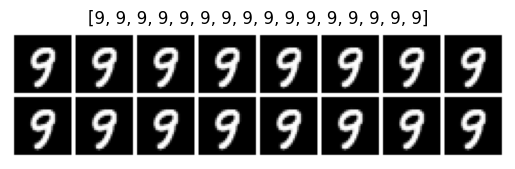

In [6]:
sample_noise = torch.zeros(1000, 100, device=device)
generated_images = generator(sample_noise)
generated_images = 0.5 * (generated_images + 1)
output = model(generated_images)
pred = output.argmax(dim=1, keepdim=True)
grid = make_grid(generated_images[:16].cpu(), nrow=8, pad_value=1)
plt.imshow(grid.permute(1, 2, 0))
plt.axis('off')
plt.title([int(pred[x]) for x in range(16)])
plt.show()
#print(torch.exp(output[0])) # torch.exp converts the output back into regular softmax probabilities (confidences)
avg_conf = torch.mean(torch.exp(output).max(dim=1).values)

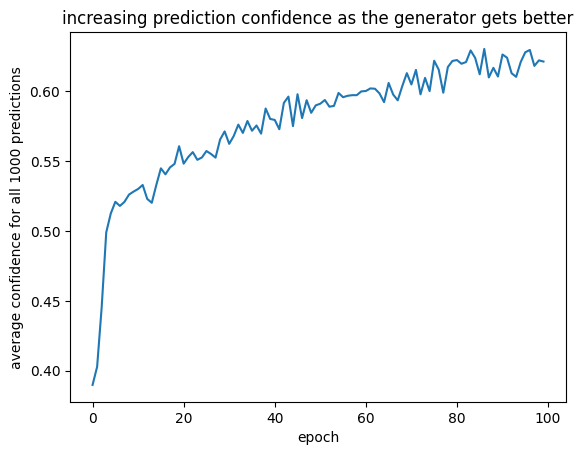

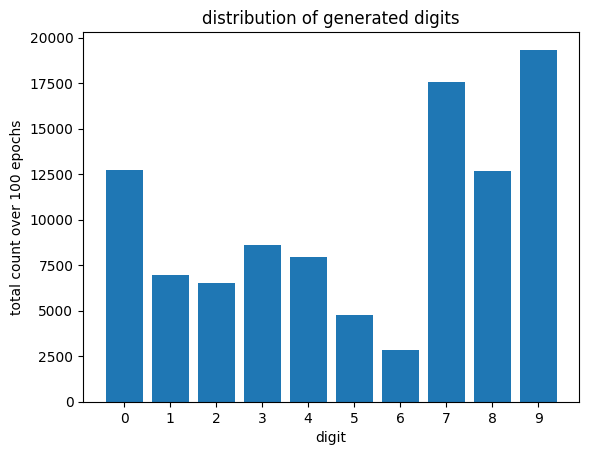

In [7]:
# now let's plot the average confidences in the predictions over the epochs
import matplotlib.pyplot as plt
plt.plot([float(c) for c in confidences])
plt.xlabel("epoch")
plt.ylabel("average confidence for all 1000 predictions")
plt.title("increasing prediction confidence as the generator gets better")
plt.show()

plt.bar([f"{x}" for x in range(10)], counts)
plt.xlabel("digit")
plt.ylabel("total count over 100 epochs")
plt.title("distribution of generated digits")
plt.show()